# Final Project Data Science Batch 23B

# Most Streamed Spotify Songs 2023
`(https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)`

Dataset berisi daftar lengkap lagu-lagu paling terkenal di tahun 2023 yang terdaftar di Spotify. Dataset ini menawarkan banyak fitur di luar apa yang biasanya tersedia di dataset serupa. Dataset ini memberikan wawasan tentang atribut, popularitas, dan keberadaan setiap lagu di berbagai platform musik.

## Overview
Menganalisis karakteristik lagu-lagu yang berhasil atau populer di berbagai platform musik untuk memahami faktor-faktor yang memengaruhi popularitas dan preferensi pengguna.

## Expected Output
1. `Insight Platform Musik`:
Menampilkan distribusi lagu-lagu di berbagai platform musik (Spotify, Apple Music, Deezer, Shazam).
Menyoroti lagu-lagu yang sering muncul di playlist atau chart platform tertentu
2. `Analisis Popularitas`:
Menampilkan distribusi jumlah streams untuk lagu-lagu dalam dataset.
Mengidentifikasi lagu-lagu yang paling populer berdasarkan jumlah streams.
3. `Analisis Kategori Musik`:
Menampilkan distribusi kunci (key) dan mode lagu-lagu dalam dataset.
Mengidentifikasi preferensi kunci dan mode yang umum dalam lagu-lagu populer.
4. `Korelasi Karakteristik Musik dan Popularitas`:
Menampilkan matriks korelasi antara fitur-fitur seperti bpm, danceability, valence, energy, dll., dengan jumlah streams.
Menyoroti karakteristik musik yang paling berkorelasi dengan popularitas.
5. `Pengaruh Artis pada Popularitas`:
Menampilkan distribusi jumlah artis dalam lagu-lagu.
Menyoroti apakah lagu-lagu dengan lebih banyak artis cenderung lebih populer.

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finpro_Dadang Seftafian Permana/spotify-2023.csv', encoding='ISO-8859-1')

# Data Understanding

In [ ]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Terdapat kolom yang perlu ditransform ke tipe data numerik;
`streams`, `key`, `in_deezer_playlists`, `in_shazam_charts`, `mode`

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
df.shape

(953, 24)

Dataset memiliki `953` baris dan `24` kolom

In [ ]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

# Data Cleaning and Transformation

## Rename Column

In [ ]:
df.rename(columns={'artist(s)_name': "artists_name"}, inplace=True)

In [ ]:
df['released_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                        df['released_month'].astype(str) + '-' +
                        df['released_day'].astype(str), errors='coerce')

df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)

Sebagai analisis dan pemodelan, sederhanakan data tanggal dan waktu untuk meningkatkan kejelasan dan konsistensi dataset

## Missing Values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

track_name               0
artists_name             0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_date            0
dtype: int64


Terdapat 2 kolom yang memiliki missing values, yakni `in_shazam_charts` dan `key`.

Kolom `in_shazam_charts` nilai yang hilang kemungkinan besar mengindikasikan bahwa lagu tersebut tidak mencapai peringkat.


In [ ]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace(',','',regex=True).astype(float)
max = df['in_shazam_charts'].max()
df['in_shazam_charts'].fillna(max+1, inplace=True)

In [ ]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True).astype('int64')
df['in_shazam_charts'] = df['in_shazam_charts'].replace(',', '', regex=True).astype('int64')

Kolom `key` berisi informasi kunci musik yang digunakan untuk menyusun lagu.

In [ ]:
df['key'] = df['key'].fillna(-1)

Konversi nilai pada kolom `key` agar sesuai untuk pemodelan

In [ ]:
key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

df['key'] = df['key'].map(key_num).fillna(-1)
df['key'].head()

0    11.0
1     1.0
2     5.0
3     9.0
4     9.0
Name: key, dtype: float64

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
df = df.dropna(how='any')
df.isnull().sum()

track_name              0
artists_name            0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
dtype: int64

Encode kolom `mode` agar sesuai untuk pemodelan

In [ ]:
mode_dummies = pd.get_dummies(df['mode'], prefix='mode')
df = pd.concat([df, mode_dummies], axis=1)
df.drop('mode', axis=1, inplace=True)

In [ ]:
df = df.copy()

df.loc[:, 'key'] = df['key'].astype('int64')
df.loc[:, 'streams'] = df['streams'].astype('int64')

<ipython-input-19-87010dedfa88>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'key'] = df['key'].astype('int64')
<ipython-input-19-87010dedfa88>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'streams'] = df['streams'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artists_name          952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   in_spotify_playlists  952 non-null    int64         
 4   in_spotify_charts     952 non-null    int64         
 5   streams               952 non-null    int64         
 6   in_apple_playlists    952 non-null    int64         
 7   in_apple_charts       952 non-null    int64         
 8   in_deezer_playlists   952 non-null    int64         
 9   in_deezer_charts      952 non-null    int64         
 10  in_shazam_charts      952 non-null    int64         
 11  bpm                   952 non-null    int64         
 12  key                   952 non-null    int64         
 13  danceability_%      

Missing Values berhasil dihilangkan.

## Data Duplicated

In [ ]:
duplicates = df.duplicated()

In [ ]:
df = df[~duplicates]

In [ ]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data.

## Data Types

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artists_name          952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   in_spotify_playlists  952 non-null    int64         
 4   in_spotify_charts     952 non-null    int64         
 5   streams               952 non-null    int64         
 6   in_apple_playlists    952 non-null    int64         
 7   in_apple_charts       952 non-null    int64         
 8   in_deezer_playlists   952 non-null    int64         
 9   in_deezer_charts      952 non-null    int64         
 10  in_shazam_charts      952 non-null    int64         
 11  bpm                   952 non-null    int64         
 12  key                   952 non-null    int64         
 13  danceability_%      

## Statistical Summary

In [ ]:
categoricals = ['track_name', 'artists_name']

numericals = ['artist_count',
              'in_spotify_playlists',
              'in_spotify_charts',
              'streams',
              'in_apple_playlists',
              'in_apple_charts',
              'in_deezer_playlists',
              'in_deezer_charts',
              'in_shazam_charts',
              'bpm',
              'key',
              'danceability_%',
              'valence_%',
              'energy_%',
              'acousticness_%',
              'instrumentalness_%',
              'liveness_%',
              'speechiness_%',
              'released_date',
              'mode_Major',
              'mode_Minor']

In [ ]:
df[numericals].describe().T

count          mean           std     min           25%  \
artist_count          952.0  1.556723e+00  8.933314e-01     1.0  1.000000e+00   
in_spotify_playlists  952.0  5.202565e+03  7.901401e+03    31.0  8.745000e+02   
in_spotify_charts     952.0  1.202206e+01  1.958241e+01     0.0  0.000000e+00   
streams               952.0  5.141374e+08  5.668569e+08  2762.0  1.416362e+08   
in_apple_playlists    952.0  6.786660e+01  8.647059e+01     0.0  1.300000e+01   
in_apple_charts       952.0  5.196324e+01  5.062885e+01     0.0  7.000000e+00   
in_deezer_playlists   952.0  3.855357e+02  1.131079e+03     0.0  1.300000e+01   
in_deezer_charts      952.0  2.669118e+00  6.038152e+00     0.0  0.000000e+00   
in_shazam_charts      952.0  1.331681e+02  3.480614e+02     0.0  0.000000e+00   
bpm                   952.0  1.225536e+02  2.806960e+01    65.0  9.975000e+01   
key                   952.0  5.193277e+00  3.701314e+00    -1.0  2.000000e+00   
danceability_%        952.0  6.698424e+01  1.463128e+01    23.0  5.700000e+01   
valence_%             952.0  5.140651e+01  2.348053e+01     4.0  3.200000e+01   
energy_%              952.0  6.427416e+01  1.655852e+01     9.0  5.300000e+01   
acousticness_%        952.0  2.707878e+01  2.600160e+01     0.0  6.000000e+00   
instrumentalness_%    952.0  1.582983e+00  8.414064e+00     0.0  0.000000e+00   
liveness_%            952.0  1.821429e+01  1.371837e+01     3.0  1.000000e+01   
speechiness_%         952.0  1.013866e+01  9.915399e+00     2.0  4.000000e+00   
mode_Major            952.0  5.766807e-01  4.943448e-01     0.0  0.000000e+00   
mode_Minor            952.0  4.233193e-01  4.943448e-01     0.0  0.000000e+00   

                              50%           75%           max  
artist_count                  1.0  2.000000e+00  8.000000e+00  
in_spotify_playlists       2216.5  5.573750e+03  5.289800e+04  
in_spotify_charts             3.0  1.600000e+01  1.470000e+02  
streams               290530915.0  6.738690e+08  3.703895e+09  
in_apple_playlists           34.0  8.800000e+01  6.720000e+02  
in_apple_charts              38.5  8.700000e+01  2.750000e+02  
in_deezer_playlists          44.0  1.642500e+02  1.236700e+04  
in_deezer_charts              0.0  2.000000e+00  5.800000e+01  
in_shazam_charts              4.0  5.425000e+01  1.452000e+03  
bpm                         121.0  1.402500e+02  2.060000e+02  
key                           5.0  8.000000e+00  1.100000e+01  
danceability_%               69.0  7.800000e+01  9.600000e+01  
valence_%                    51.0  7.000000e+01  9.700000e+01  
energy_%                     66.0  7.700000e+01  9.700000e+01  
acousticness_%               18.0  4.300000e+01  9.700000e+01  
instrumentalness_%            0.0  0.000000e+00  9.100000e+01  
liveness_%                   12.0  2.400000e+01  9.700000e+01  
speechiness_%                 6.0  1.100000e+01  6.400000e+01  
mode_Major                    1.0  1.000000e+00  1.000000e+00  
mode_Minor                    0.0  1.000000e+00  1.000000e+00

In [ ]:
df[categoricals].describe()

track_name  artists_name
count              952           952
unique             942           644
top     Take My Breath  Taylor Swift
freq                 2            34

In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of track_name column
Take My Breath        2
Numb                  2
About Damn Time       2
Miss You              2
Daylight              2
                     ..
Murder In My Mind     1
Gangsta's Paradise    1
CAIRO                 1
I Love You So         1
Alone                 1
Name: track_name, Length: 942, dtype: int64 

Value counts of artists_name column
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: artists_name, Length: 644, dtype: int64 



## Univariate Analysis

### Boxplot to Detect Outliers

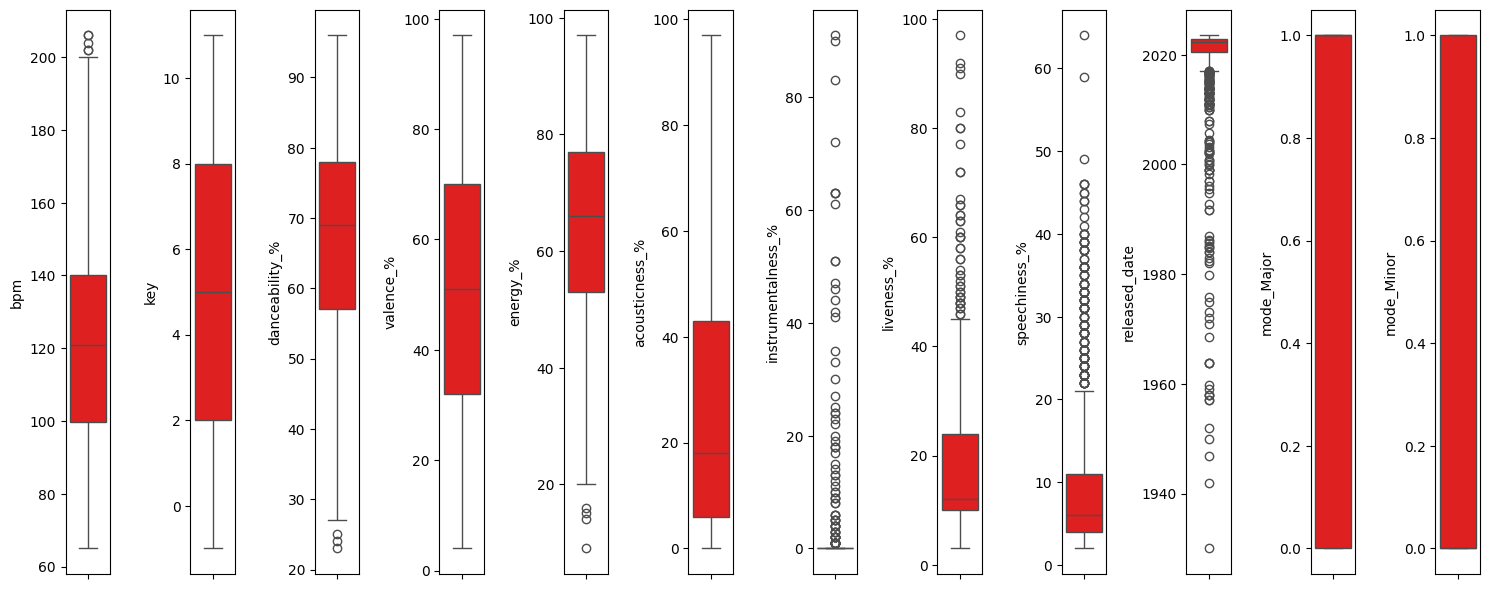

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numericals = ['bpm', 'key', 'danceability_%', 'valence_%', 'energy_%',
              'acousticness_%', 'instrumentalness_%', 'liveness_%',
              'speechiness_%', 'released_date', 'mode_Major', 'mode_Minor']

plt.figure(figsize=(15, 6))

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='red')

plt.tight_layout()
plt.show()


1. Tidak terdapat outliers pada kolom `key`, `valence_%`, `energy_`, `acousticness_%`, `mode_Major`, dan `mode_Minor`.
2. Terdapat ouliers pada beberaapa kolom sisanya seperti pada contohnya kolom `released_date` yang mengindikasikan hampir keseluruhan lagu yang terdapat dalam dataset dirilis pada tahun 2018-2023.

In [ ]:
outlier = df['bpm'].max()

df[df['bpm'] == outlier]

track_name  \
100                      Lover   
506  We Don't Talk About Bruno   

                                          artists_name  artist_count  \
100                                       Taylor Swift             1   
506  Adassa, Mauro Castillo, Stephanie Beatriz, Enc...             7   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
100                  8448                 23  882831184                 160   
506                  2785                  0  432719968                  95   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  ...  \
100              110                  163                 0  ...   
506               89                   44                 0  ...   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
100              43         50        55              50                   0   
506              58         83        45              36                   0   

     liveness_%  speechiness_%  released_date  mode_Major  mode_Minor  
100          15             10     2012-01-01           1           0  
506          11              8     2021-11-19           0           1  

[2 rows x 23 columns]

In [ ]:
outlier = df['instrumentalness_%'].max()

df[df['instrumentalness_%'] == outlier]

track_name artists_name  artist_count  in_spotify_playlists  \
684  Alien Blues     Vundabar             1                  1930   

     in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
684                  0  370068639                   3                0   

     in_deezer_playlists  in_deezer_charts  ...  danceability_%  valence_%  \
684                   28                 0  ...              47         44   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
684        76               8                  91           9              3   

     released_date  mode_Major  mode_Minor  
684     2015-07-24           1           0  

[1 rows x 23 columns]

In [ ]:
outlier = df['liveness_%'].max()

df[df['liveness_%'] == outlier]

track_name                                   artists_name  \
601  Vai Lï¿½ï¿½ Em Casa   Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &   

     artist_count  in_spotify_playlists  in_spotify_charts    streams  \
601             2                   772                  0  263894529   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
601                   7                3                   89   

     in_deezer_charts  ...  danceability_%  valence_%  energy_%  \
601                 0  ...              46         62        83   

     acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
601              53                   0          97             28   

     released_date  mode_Major  mode_Minor  
601     2021-10-22           0           1  

[1 rows x 23 columns]

In [ ]:
outlier = df['speechiness_%'].max()

df[df['speechiness_%'] == outlier]

track_name            artists_name  artist_count  \
247  Cartï¿½ï¿½o B  MC Caverinha, KayBlack             2   

     in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  \
247                   269                  4  71573339                   7   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  ...  \
247                2                   30                 1  ...   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
247              84         55        47              26                   0   

     liveness_%  speechiness_%  released_date  mode_Major  mode_Minor  
247          20             64     2023-05-11           0           1  

[1 rows x 23 columns]

In [ ]:
outlier = df['danceability_%'].min()

df[df['danceability_%'] == outlier]

track_name                                       artists_name  \
469  White Christmas  Bing Crosby, John Scott Trotter & His Orchestr...   

     artist_count  in_spotify_playlists  in_spotify_charts    streams  \
469             3                 11940                  0  395591396   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
469                  73               79                  123   

     in_deezer_charts  ...  danceability_%  valence_%  energy_%  \
469                 0  ...              23         19        25   

     acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
469              91                   0          40              3   

     released_date  mode_Major  mode_Minor  
469     1942-01-01           1           0  

[1 rows x 23 columns]

In [ ]:
outlier = df['released_date'].min()

df[df['released_date'] == outlier]

track_name             artists_name  artist_count  \
439  Agudo Mï¿½ï¿½gi  Styrx, utku INC, Thezth             3   

     in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  \
439                   323                  0  90598517                   4   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  ...  \
439                0                   14                 0  ...   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
439              65         49        80              22                   4   

     liveness_%  speechiness_%  released_date  mode_Major  mode_Minor  
439           7              5     1930-01-01           0           1  

[1 rows x 23 columns]

### KDE Plot for Knowing The Distribution Form

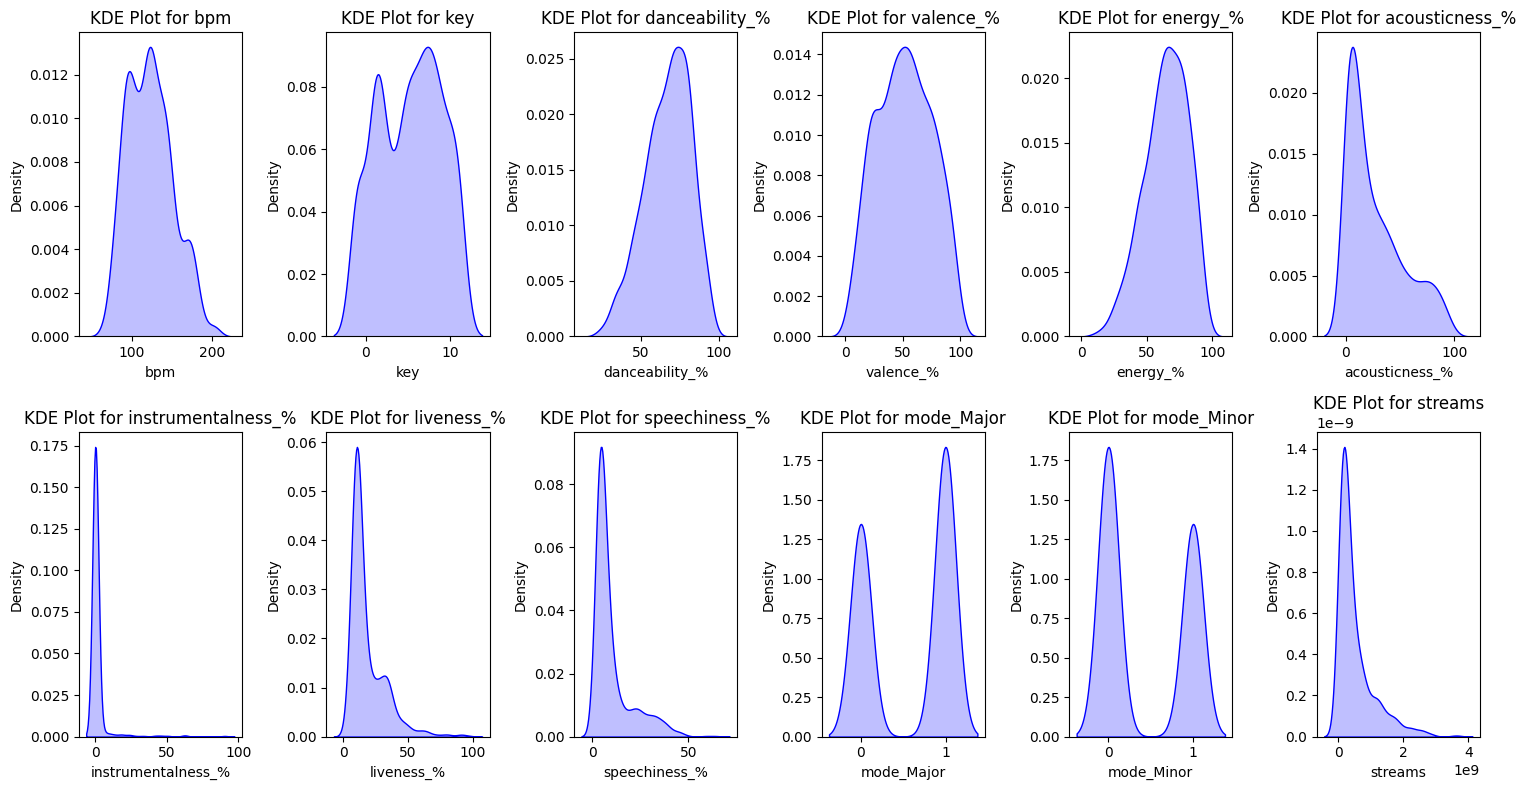

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


numericals = ['bpm', 'key', 'danceability_%', 'valence_%', 'energy_%',
              'acousticness_%', 'instrumentalness_%', 'liveness_%',
              'speechiness_%', 'mode_Major', 'mode_Minor', 'streams']

plt.figure(figsize=(15, 8))

for i in range(0, len(numericals)):
    plt.subplot(2, math.ceil(len(numericals)/2), i+1)
    sns.kdeplot(df[numericals[i]], fill=True, color='blue')
    plt.title(f'KDE Plot for {numericals[i]}')

plt.tight_layout()
plt.show()


1. Terdapat beberapa variabel yang memiliki kecenderungan nilai kecil, yakni `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`, dan `streams`. Mengindikasikan Skewed Positif.
2. Pada `acousticness_%` sebagian besar lagu cenderung memiliki tingkat akustik yang rendah (lebih banyak elemen elektronik atau rekaman studio).
3. Pada `instrumentalness_%` menunjukkan sebagian besar lagu memiliki elemen instrumental yang rendah (lebih dominan elemen vokal dibanding komposisi alat musik/instrumental).
4. Pada `liveness_%` kecenderungan musik yang dihasilkan melalui rekaman studio lebih besar daripada rekaman live.
5. Pada `speechiness_%`menunjukkan jika keseluruhan daftar lagu yang terdapat dalam dataset memiliki komposisi jumlah kata/lirik yang rendah.
6. Pada `streams` sebagian besar lagu memiliki jumlah stream yang relatif rendah, tetapi ada beberapa lagu dengan jumlah stream yang sangat tinggi.

## Bivariate Analysis

In [ ]:
audio_features = ['bpm', 'danceability_%', 'valence_%',
                  'energy_%', 'acousticness_%', 'instrumentalness_%',
                  'liveness_%', 'speechiness_%']

In [ ]:
df[audio_features].head()

bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0  125              80         89        83              31   
1   92              71         61        74               7   
2  138              51         32        53              17   
3  170              55         58        72              11   
4  144              65         23        80              14   

   instrumentalness_%  liveness_%  speechiness_%  
0                   0           8              4  
1                   0          10              4  
2                   0          31              6  
3                   0          11             15  
4                  63          11              6

### Correlation Heat Map

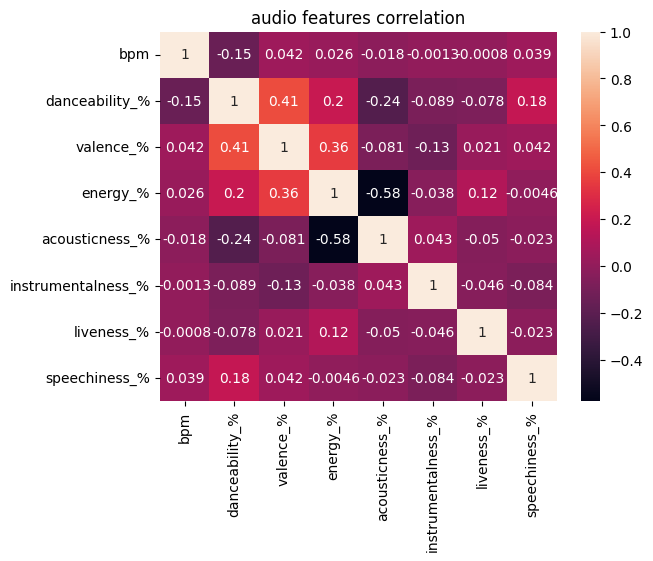

In [ ]:
audio_features = ["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
feature_matrix = df[audio_features].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("audio features correlation")
plt.show()

Mayoritas `audio_features` memiliki korelasi negatif yang lemah dengan jumlah `streams`, yang mengindikasikan hubungan terbalik yang ringan.
1. `energy_%` dan `acousticness_%` berkorelasi negatif.

Mengindikasikan lagu dengan elemen akustik yang rendah = lebih elektronik, memiliki tingkat energi yang lebih tinggi.

2. `valence_%` dan `danceability_%` berkorelasi satu sama lain.

Lagu dengan `danceability_%` tinggi memiliki korelasi positif dengan `valence_%`; menunjukkan kemungkinan besar lagu tersebut memiliki nuansa positif dan ceria.

### Scatter Plot

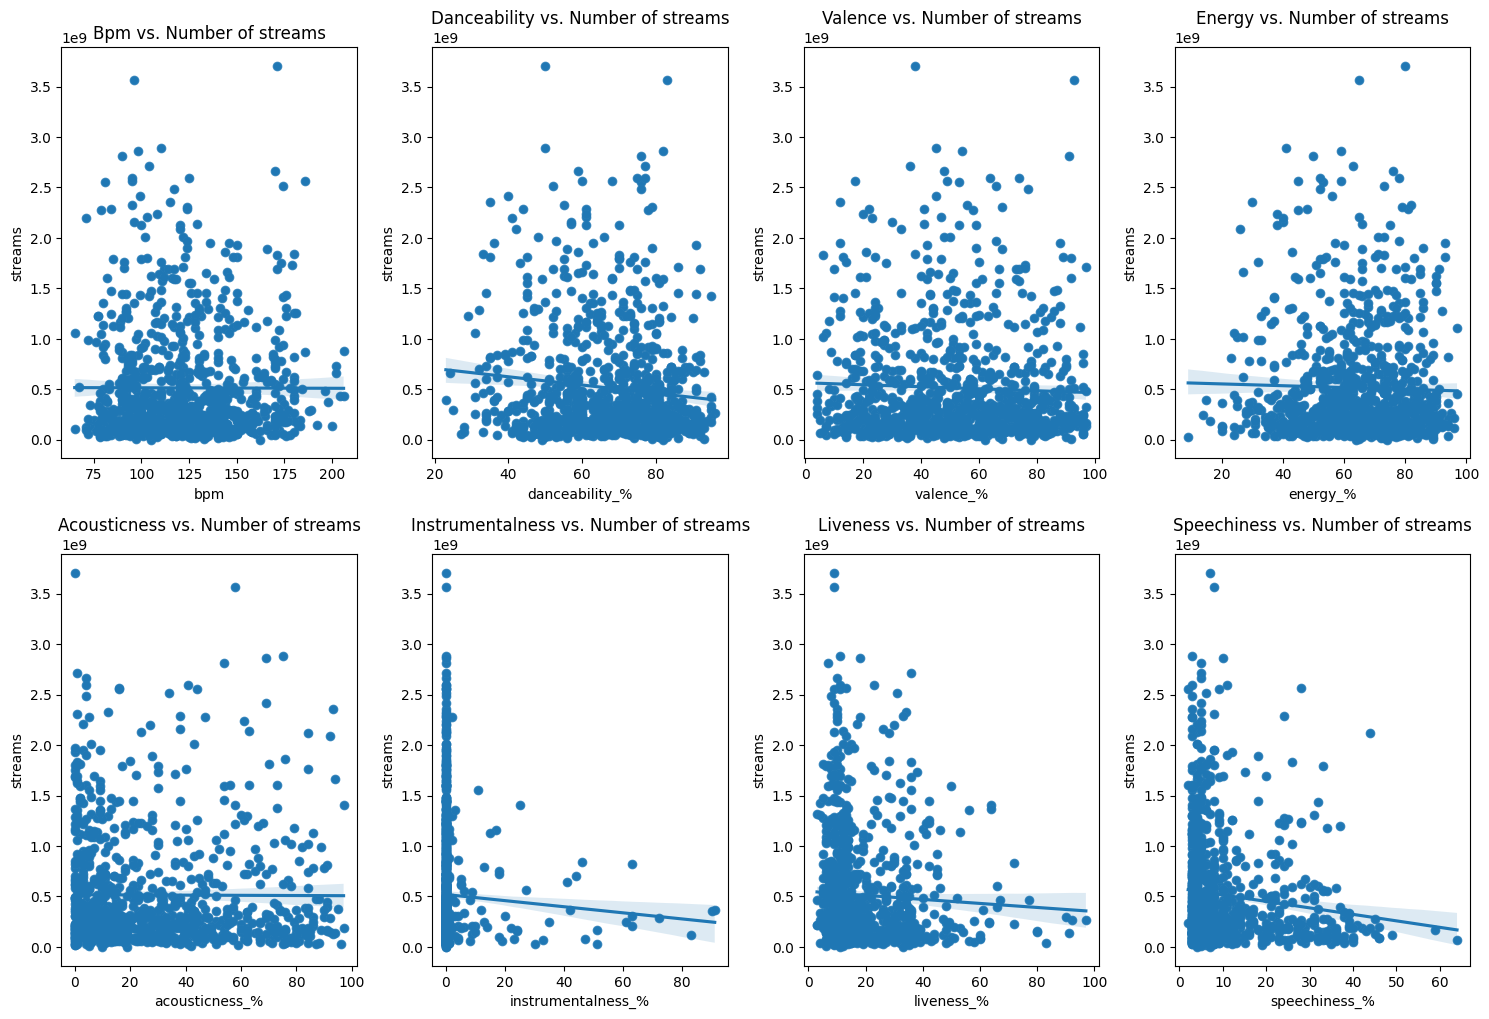

In [ ]:
plt.figure(figsize=(15,20))

for i, feature in enumerate(audio_features, start=1):
    plt.subplot(4,4, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'])
    sns.regplot(x=df[feature], y=df['streams'])

plt.tight_layout()
plt.show()

1. `instrumentalness_%`, `liveness_%`, `speechiness_%` berkorelasi negatif dengan `streams`.
2. `bpm`, `danceability_%`, `valence_%`, `energy_%` berkorelasi positif terhadap `streams`. Hal ini menunjukkan lagu-lagu dengan elemen up-beat, energik dan memiliki nuansa positif lebih banyak menarik minat pendengar.

## Data Visualization

### Top 10 Most Streamed Songs

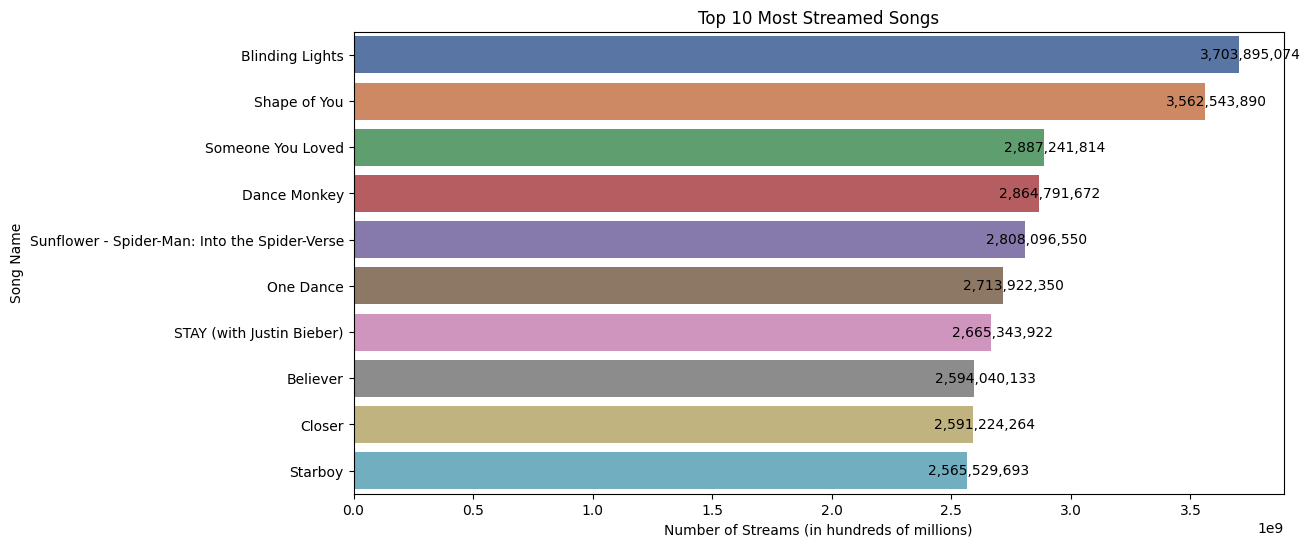

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_songs_df = df.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='streams', y='track_name', data=top_songs_df, palette='deep', hue='track_name', dodge=False)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(8, 0), textcoords='offset points')

plt.title('Top 10 Most Streamed Songs')
plt.xlabel('Number of Streams (in hundreds of millions)')
plt.ylabel('Song Name')

plt.show()


### Top 10 Artists in Spotify Charts

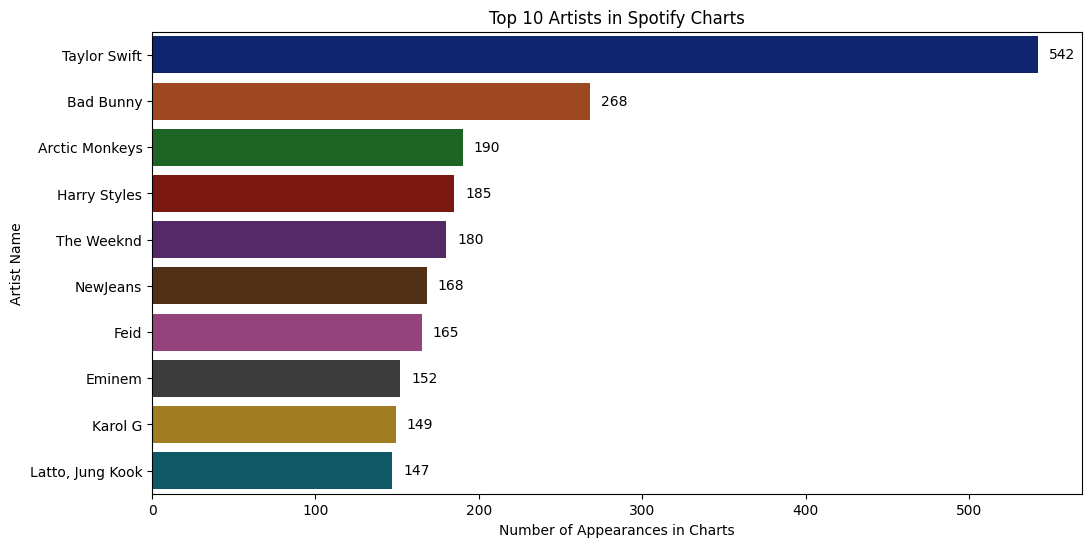

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists_df = df.groupby('artists_name')['in_spotify_charts'].sum().reset_index()

top_artists_df = top_artists_df.sort_values(by='in_spotify_charts', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='in_spotify_charts', y='artists_name', data=top_artists_df, palette='dark', hue='artists_name', dodge=False)

for i, p in enumerate(ax.patches):
    ax.annotate(f'{top_artists_df["in_spotify_charts"].iloc[i]:,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(8, 0), textcoords='offset points')

plt.title('Top 10 Artists in Spotify Charts')
plt.xlabel('Number of Appearances in Charts')
plt.ylabel('Artist Name')

plt.show()


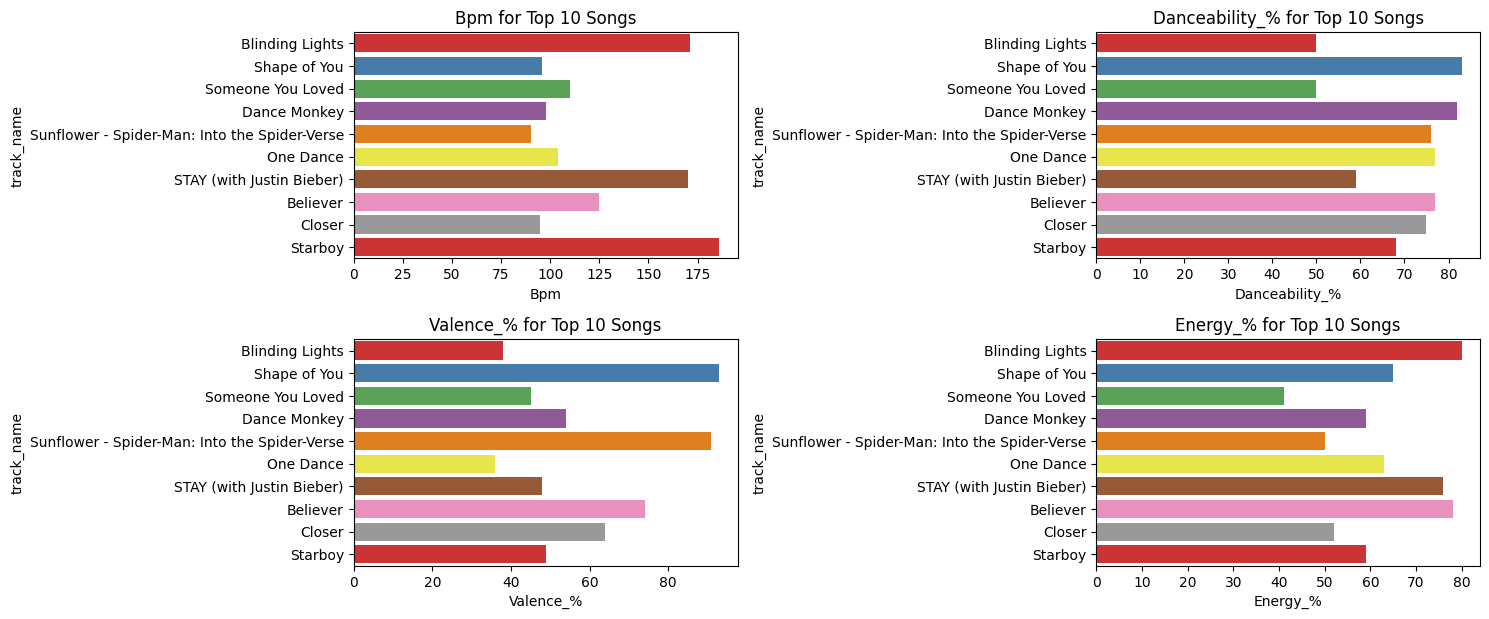

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_songs_df = df.sort_values(by='streams', ascending=False).head(10)

audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(audio_features, 1):
    plt.subplot(4, 2, i)
    sns.barplot(x=feature, y='track_name', data=top_songs_df, hue='track_name', palette='Set1', dodge=False)
    plt.title(f'{feature.capitalize()} for Top 10 Songs')
    plt.xlabel(f'{feature.capitalize()}')

plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artists_name          952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   in_spotify_playlists  952 non-null    int64         
 4   in_spotify_charts     952 non-null    int64         
 5   streams               952 non-null    int64         
 6   in_apple_playlists    952 non-null    int64         
 7   in_apple_charts       952 non-null    int64         
 8   in_deezer_playlists   952 non-null    int64         
 9   in_deezer_charts      952 non-null    int64         
 10  in_shazam_charts      952 non-null    int64         
 11  bpm                   952 non-null    int64         
 12  key                   952 non-null    int64         
 13  danceability_%      

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns=['track_name', 'artists_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'key', 'released_date', 'mode_Major', 'mode_Minor'])
target = df[['streams']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## VIF Score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

feature  vif_score
1                 bpm   1.056611
2      danceability_%   1.387343
3           valence_%   1.450267
4            energy_%   1.823346
5      acousticness_%   1.653125
6  instrumentalness_%   1.031000
7          liveness_%   1.022262
8       speechiness_%   1.057083


1. Keseluruhan `hasil VIF Score` menunjukkan bahwa variabel-variabel audio memiliki tingkat independensi yang baik satu sama lain.
2. Tidak terdapat masalah `multikoliniearitas` yang signifikan. Sebagai aturan praktis, nilai VIF di atas 5 atau 10 dapat dianggap sebagai tanda masalah multikolinieritas.

# Model Training

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

X_df_train_scaled_minmax = scaler_minmax.fit_transform(feature_df_train)

X_df_train_scaled_minmax = pd.DataFrame(X_df_train_scaled_minmax, columns=feature_df_train.columns)


In [ ]:
X_df_test_scaled_minmax = scaler_minmax.transform(feature_df_test)

X_df_test_scaled_minmax = pd.DataFrame(X_df_test_scaled_minmax, columns=feature_df_test.columns)


## K-Means Clustering

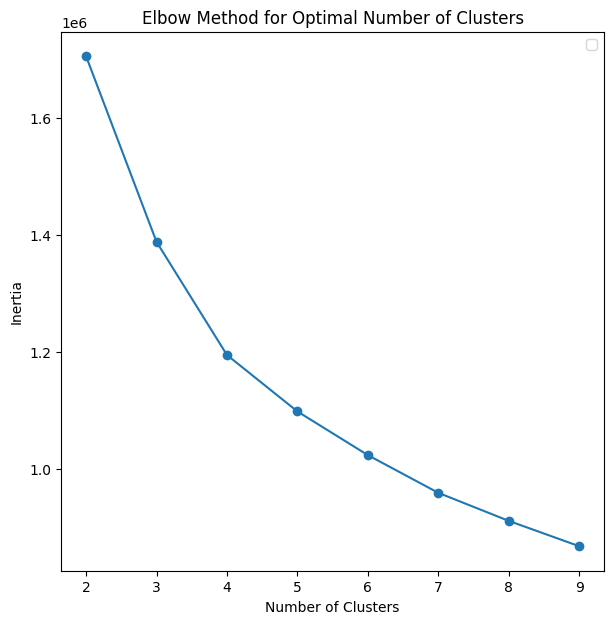

In [ ]:
from sklearn.cluster import KMeans

clusters_range = range(2,10)
inertias=[]

X_scaled = X_df_train_scaled_minmax

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.legend()
plt.show()


Elbow poin terletak K=6

In [ ]:
!pip install yellowbrick

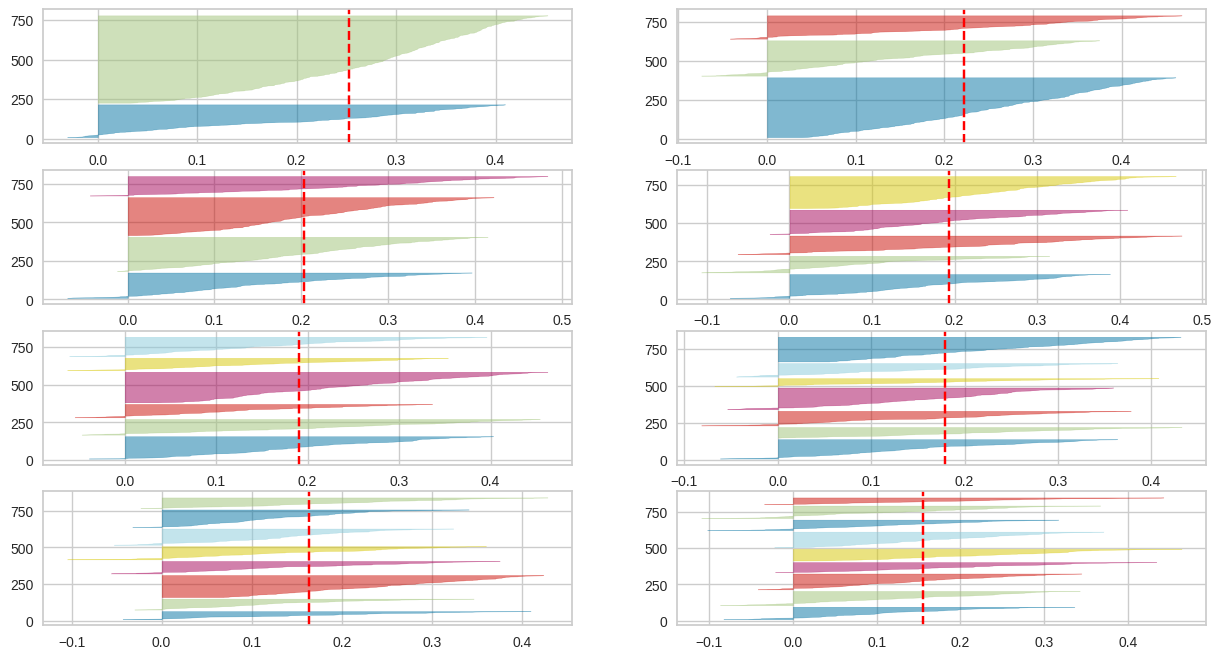

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

X_scaled = X_df_train_scaled_minmax

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Jumlah cluster optimal mungkin adalah 2, karena memiliki silhouette score. Namun, terlalu sedikit cluster dapat mengakibatkan kehilangan informasi tentang variasi yang mungkin terdapat dalam data.

## Evaluation

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1,

In [ ]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X_pca_df['Labels'] = kmeans.fit_predict(X_pca_df[['X1', 'X2', 'X3']])

cluster_descriptives = X_pca_df.groupby('Labels')[['X1', 'X2', 'X3']].describe()

print(cluster_descriptives)


           X1                                                         \
        count       mean        std        min        25%        50%   
Labels                                                                 
0       227.0  -8.168464  17.714219 -45.977663 -20.439848 -10.097832   
1       384.0 -13.886282  16.901804 -53.415607 -25.961897 -15.675652   
2       150.0  47.910492  20.977327   8.438945  31.303967  47.403885   

                                  X2             ...                        \
              75%         max  count       mean  ...        75%        max   
Labels                                           ...                         
0        2.961929   51.278940  227.0  31.312572  ...  45.025319  88.795931   
1       -0.632235   30.497364  384.0 -17.629825  ...  -3.261317  12.161229   
2       61.856474  100.465248  150.0  -2.254008  ...  16.058814  62.180272   

           X3                                                                  \
        count    

1. `Cluster 0` cenderung memiliki nilai positif pada dimensi X1, X2, dan X3, dengan sebagian besar data terdistribusi di bagian atas rentang nilai.
2. `Cluster 1` cenderung memiliki nilai negatif pada dimensi X1 dan X2, dengan sebagian besar data terdistribusi di bagian bawah rentang nilai. Namun, dimensi X3 cenderung mendekati nol.
3. `Cluster 2` memiliki nilai positif pada dimensi X1 dan X3, dengan sebagian besar data terdistribusi di bagian tengah dan atas rentang nilai.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
feature_df_train['Labels'] = kmeans.fit_predict(feature_df_train)

results_df = feature_df_train.copy()

results_df = results_df.astype({'bpm':'int32', 'danceability_%':'int32', 'valence_%':'int32', 'energy_%':'int32', 'acousticness_%':'int32', 'instrumentalness_%':'int32', 'liveness_%':'int32', 'speechiness_%':'int32'})

results_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 318 to 102
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   bpm                 761 non-null    int32
 1   danceability_%      761 non-null    int32
 2   valence_%           761 non-null    int32
 3   energy_%            761 non-null    int32
 4   acousticness_%      761 non-null    int32
 5   instrumentalness_%  761 non-null    int32
 6   liveness_%          761 non-null    int32
 7   speechiness_%       761 non-null    int32
 8   Labels              761 non-null    int32
dtypes: int32(9)
memory usage: 32.7 KB


In [ ]:
results_df

bpm  danceability_%  valence_%  energy_%  acousticness_%  \
318  110              81         64        79               5   
545   94              57         36        58               5   
557   88              56         58        55              35   
109  108              61         47        68               0   
77   131              71         24        47               1   
..   ...             ...        ...       ...             ...   
106  116              80         92        80               4   
270   96              72         40        47              71   
861  154              70         97        62              47   
435   85              65         36        47              31   
102  170              50         37        90               0   

     instrumentalness_%  liveness_%  speechiness_%  Labels  
318                   0          31              3       3  
545                   0          15              3       0  
557                   0          23             11       0  
109                   0          13              3       0  
77                    0          27              9       5  
..                  ...         ...            ...     ...  
106                   0          10              3       3  
270                   0          13              4       1  
861                   0          10              4       2  
435                   0          12             10       0  
102                   0          12              5       5  

[761 rows x 9 columns]

## Interpretation

In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

### Cluster 0

In [ ]:
summary[0]

count       mean        std   min   25%   50%    75%  \
bpm                 149.0  93.852349  10.774956  71.0  85.0  93.0  101.0   
danceability_%      149.0  67.046980  13.773425  28.0  58.0  70.0   78.0   
valence_%           149.0  36.550336  13.654242   4.0  26.0  37.0   47.0   
energy_%            149.0  64.228188  14.016940  20.0  54.0  64.0   74.0   
acousticness_%      149.0  17.040268  13.614817   0.0   5.0  14.0   28.0   
instrumentalness_%  149.0   1.557047   8.805237   0.0   0.0   0.0    0.0   
liveness_%          149.0  18.395973  12.837771   3.0  10.0  13.0   24.0   
speechiness_%       149.0  10.832215   9.618677   2.0   4.0   6.0   14.0   
Labels              149.0   0.000000   0.000000   0.0   0.0   0.0    0.0   

                      max  
bpm                 120.0  
danceability_%       92.0  
valence_%            61.0  
energy_%             94.0  
acousticness_%       49.0  
instrumentalness_%   91.0  
liveness_%           83.0  
speechiness_%        46.0  
Labels                0.0

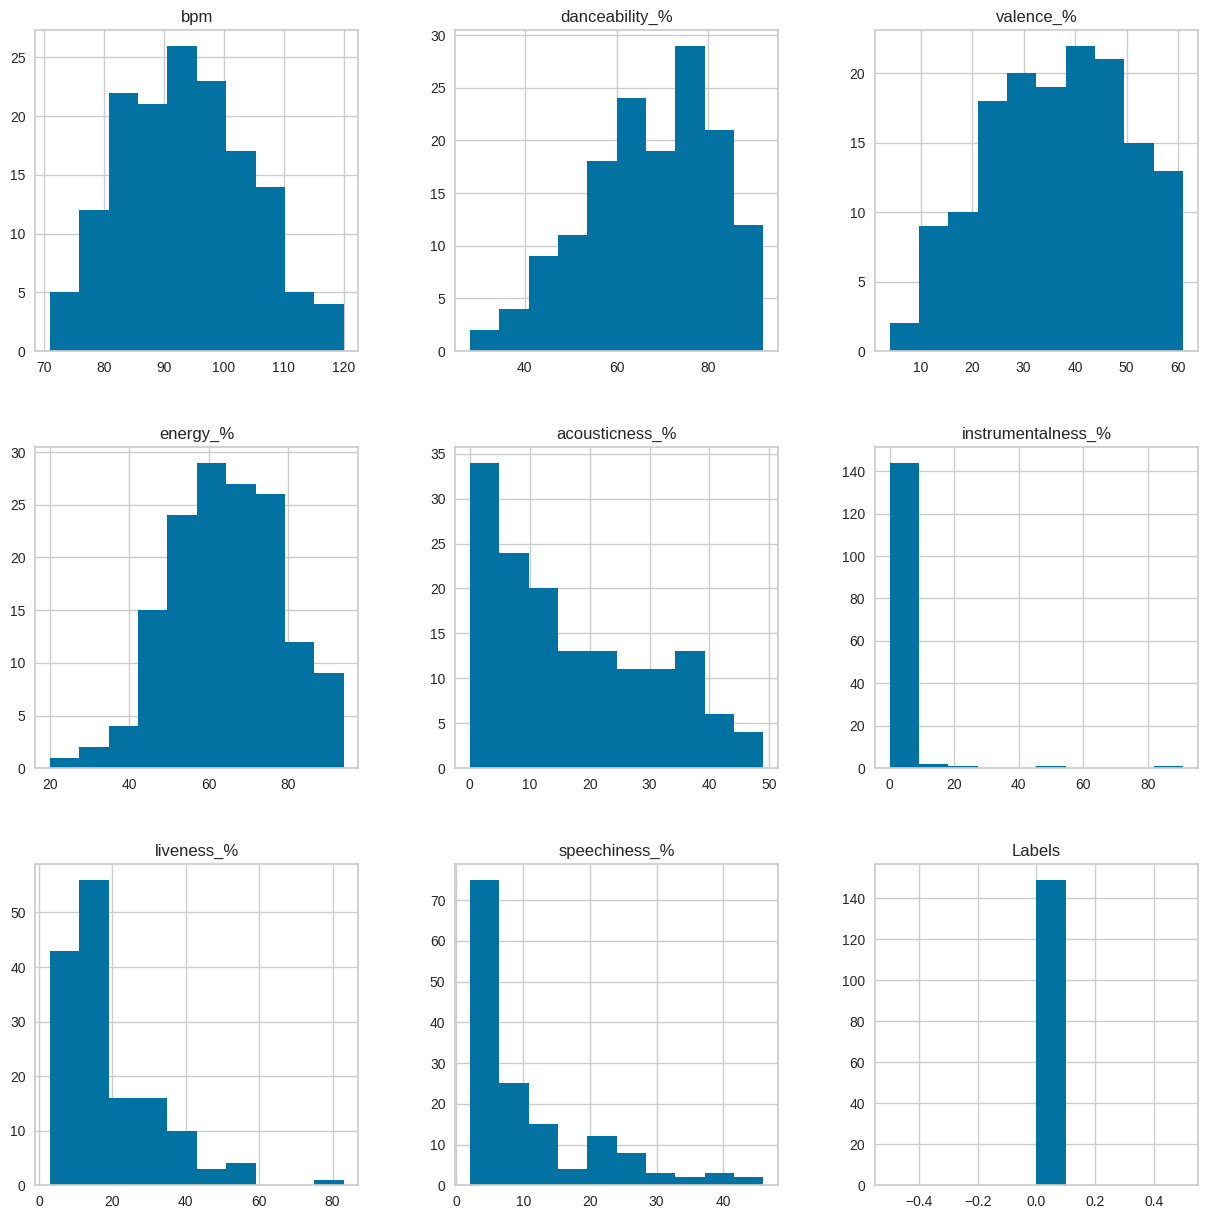

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

`Cluster 0` memiliki lagu-lagu dengan karakteristik seperti danceability, energy, dan liveness yang terkonsentrasi di sekitar nilai median. Distribusi variasi pada beberapa fitur menunjukkan keberagaman dalam kluster ini. Lagu-lagu dalam kluster ini cenderung memiliki nilai akustik yang rendah dan kecenderungan untuk memiliki instrumen yang dominan.

### Cluster 1

In [ ]:
summary[1]

count        mean        std   min   25%    50%    75%  \
bpm                 105.0  116.523810  26.504751  65.0  96.0  115.0  134.0   
danceability_%      105.0   54.342857  13.198068  23.0  44.0   56.0   65.0   
valence_%           105.0   32.466667  15.391098   6.0  20.0   31.0   43.0   
energy_%            105.0   41.209524  12.735244   9.0  32.0   43.0   49.0   
acousticness_%      105.0   73.676190  14.206239  41.0  63.0   76.0   84.0   
instrumentalness_%  105.0    2.390476   9.668043   0.0   0.0    0.0    0.0   
liveness_%          105.0   14.685714   9.504366   6.0  10.0   11.0   14.0   
speechiness_%       105.0    7.666667   9.296057   2.0   3.0    4.0    6.0   
Labels              105.0    1.000000   0.000000   1.0   1.0    1.0    1.0   

                      max  
bpm                 177.0  
danceability_%       80.0  
valence_%            74.0  
energy_%             68.0  
acousticness_%       97.0  
instrumentalness_%   72.0  
liveness_%           64.0  
speechiness_%        39.0  
Labels                1.0

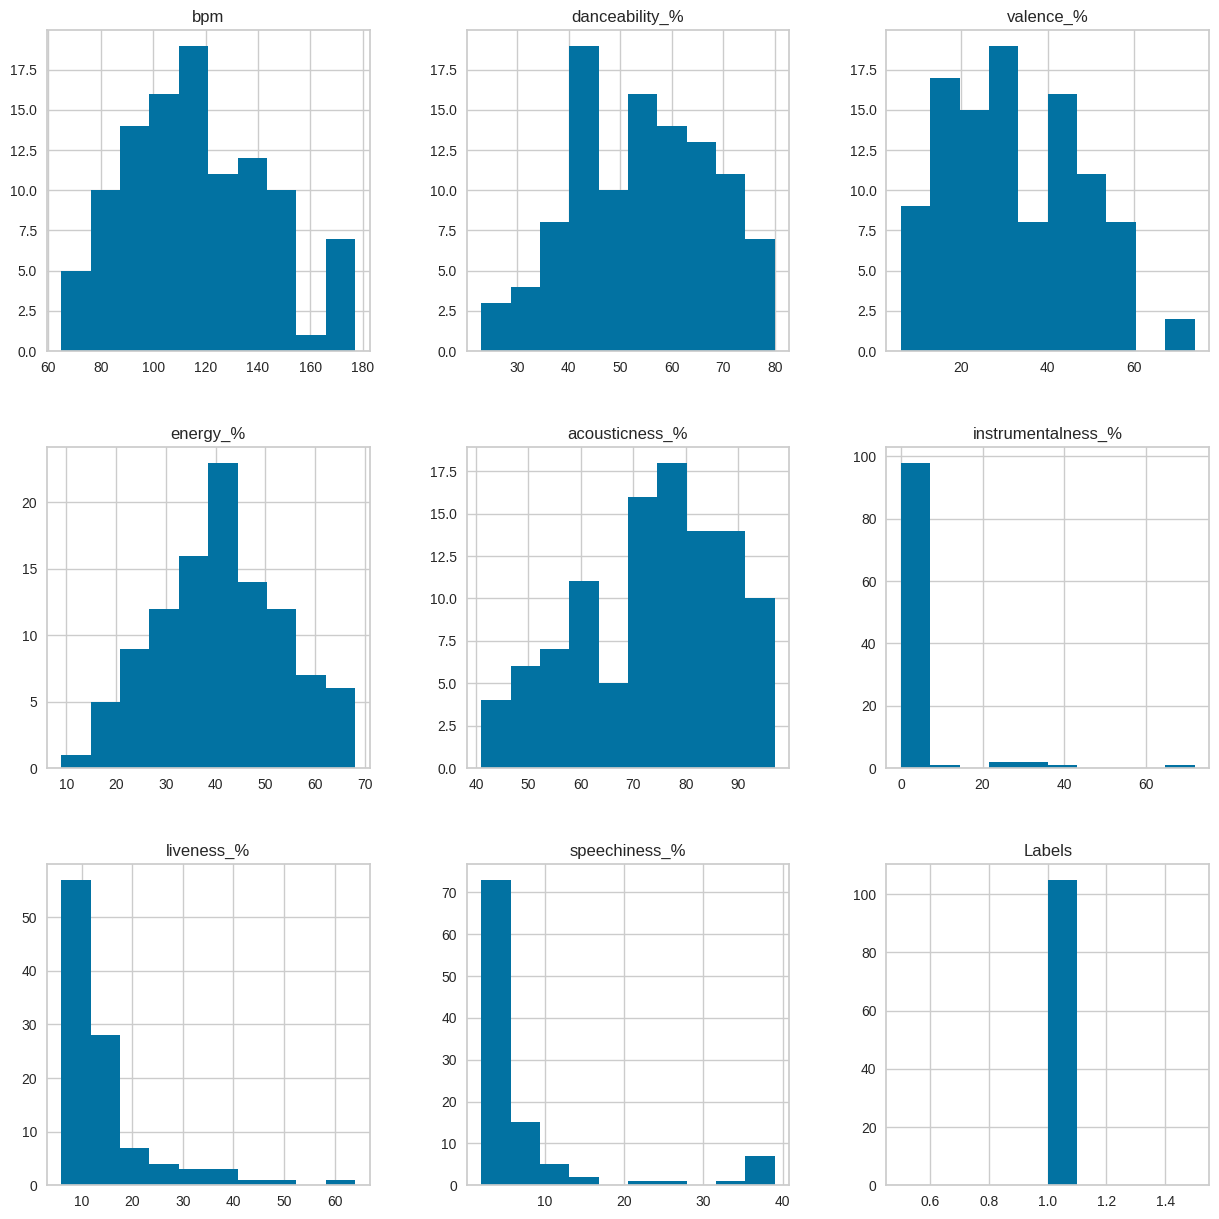

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

`Cluster 1` memiliki lagu-lagu dengan bpm dan valence untuk dipertahankan serta danceability yang cukup baik. Meskipun variasi dalam beberapa fitur, sebagian besar lagu di kluster ini memiliki nada akustik yang cukup tinggi, serta cenderung memiliki suasana yang lebih rendah atau melankolis..

Ini berarti, jika menyukai lagu-lagu yang memiliki ketukan menarik dan suasana yang cocok untuk suasana hati yang lebih santai atau melankolis, mungkin menemukan kepuasan di kluster ini.

### Cluster 2

In [ ]:
summary[2]

count        mean        std   min     25%    50%     75%  \
bpm                  90.0  121.888889  19.001741  72.0  110.25  124.5  135.00   
danceability_%       90.0   77.244444  10.392641  51.0   70.25   78.0   84.75   
valence_%            90.0   72.777778  14.800378  36.0   62.25   74.5   83.75   
energy_%             90.0   61.944444  14.007511  30.0   52.00   62.5   73.00   
acousticness_%       90.0   51.044444  14.983820  24.0   40.00   49.0   58.75   
instrumentalness_%   90.0    0.944444   5.583606   0.0    0.00    0.0    0.00   
liveness_%           90.0   17.344444  14.020980   5.0    9.00   12.0   18.75   
speechiness_%        90.0   11.244444  11.075138   2.0    4.00    5.5   13.00   
Labels               90.0    2.000000   0.000000   2.0    2.00    2.0    2.00   

                      max  
bpm                 154.0  
danceability_%       95.0  
valence_%            97.0  
energy_%             93.0  
acousticness_%       95.0  
instrumentalness_%   51.0  
liveness_%           90.0  
speechiness_%        46.0  
Labels                2.0

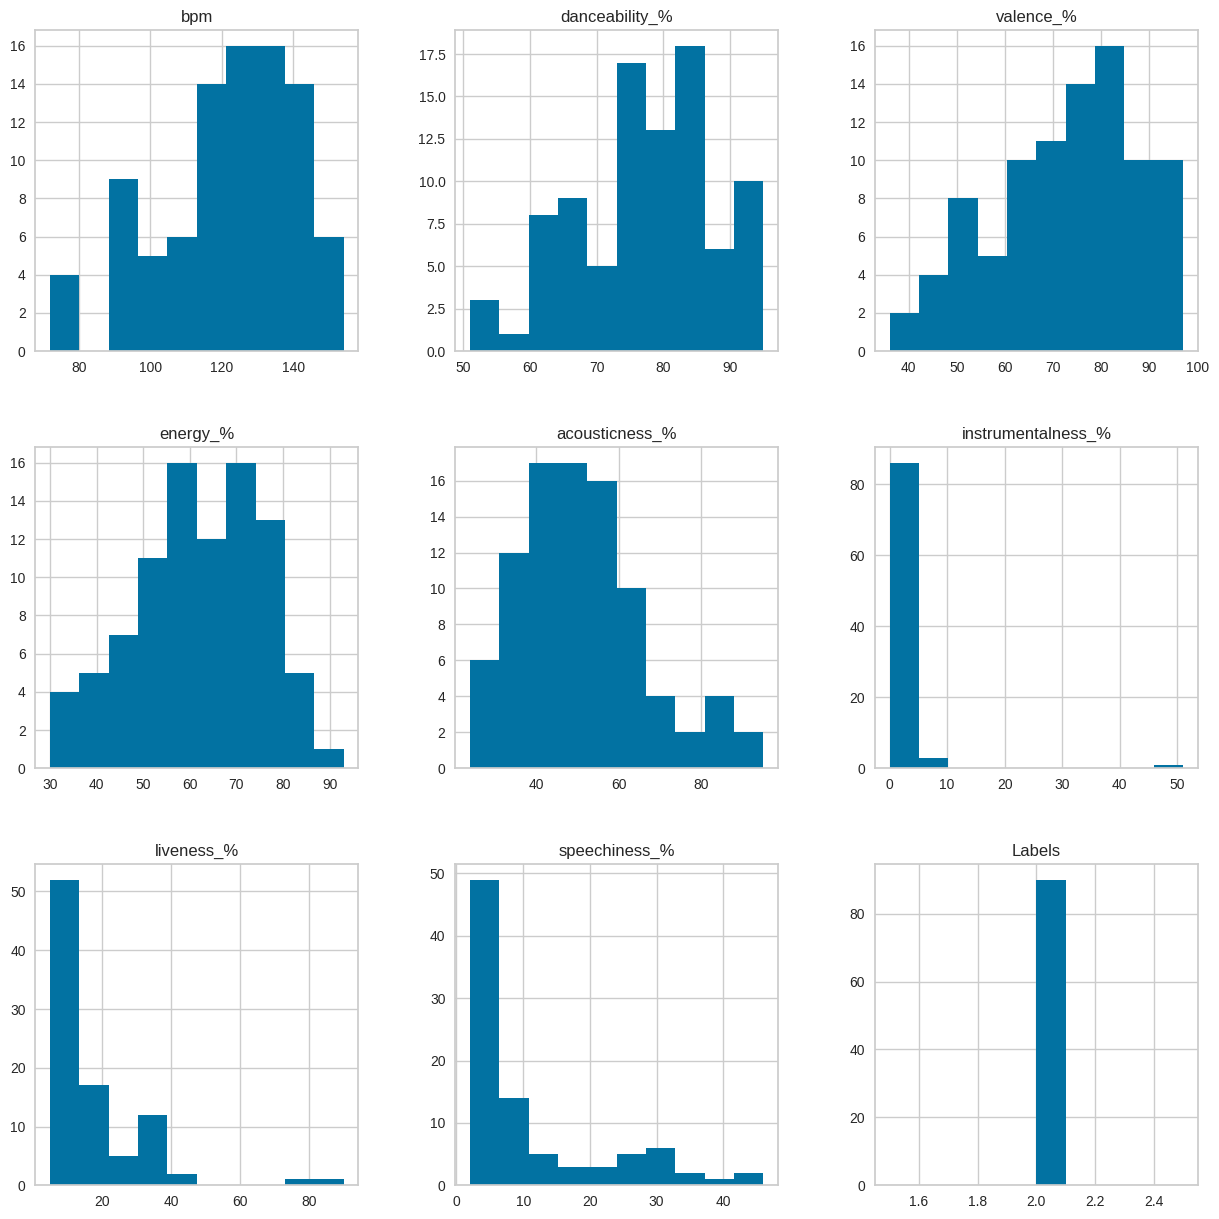

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

`Cluster 2` memiliki lagu-lagu dengan karakteristik yang membuatnya cocok untuk kegiatan yang memerlukan energi dan gerakan, seperti kegiatan olahraga atau pesta. Meskipun variasi dalam suasana dan elemen akustik, lagu-lagu ini cenderung mendekati genre tari dengan vokal yang lebih terasa.

Selain itu, sebagian besar berisi lagu-lagu yang cocok untuk suasana pesta atau aktivitas yang membutuhkan gerakan. Mereka memiliki kecepatan yang cukup tinggi (BPM), enak untuk ditarikan, dan cenderung memberikan suasana yang positif. Meskipun ada variasi dalam kehadiran instrumen atau vokal, lagu-lagu ini umumnya lebih modern dan kurang berkarakter akustik. Jadi, jika mencari lagu-lagu yang seru untuk dijadikan latar belakang acara yang berenergi, kluster ini bisa menjadi pilihan yang cukup baik.

### Cluster 3

In [ ]:
summary[3]

count        mean        std   min    25%    50%     75%  \
bpm                 204.0  115.666667  16.326010  77.0  103.0  120.0  126.00   
danceability_%      204.0   75.127451  10.324462  44.0   70.0   76.5   82.00   
valence_%           204.0   71.387255  13.213370  42.0   61.0   70.0   82.00   
energy_%            204.0   75.544118  10.562645  36.0   69.0   77.0   83.25   
acousticness_%      204.0   10.426471   9.245928   0.0    3.0    8.0   16.00   
instrumentalness_%  204.0    0.818627   5.663942   0.0    0.0    0.0    0.00   
liveness_%          204.0   18.323529  12.995006   3.0    9.0   13.0   27.00   
speechiness_%       204.0    8.299020   6.807978   3.0    4.0    6.0   10.00   
Labels              204.0    3.000000   0.000000   3.0    3.0    3.0    3.00   

                      max  
bpm                 150.0  
danceability_%       95.0  
valence_%            96.0  
energy_%             96.0  
acousticness_%       36.0  
instrumentalness_%   61.0  
liveness_%           72.0  
speechiness_%        42.0  
Labels                3.0

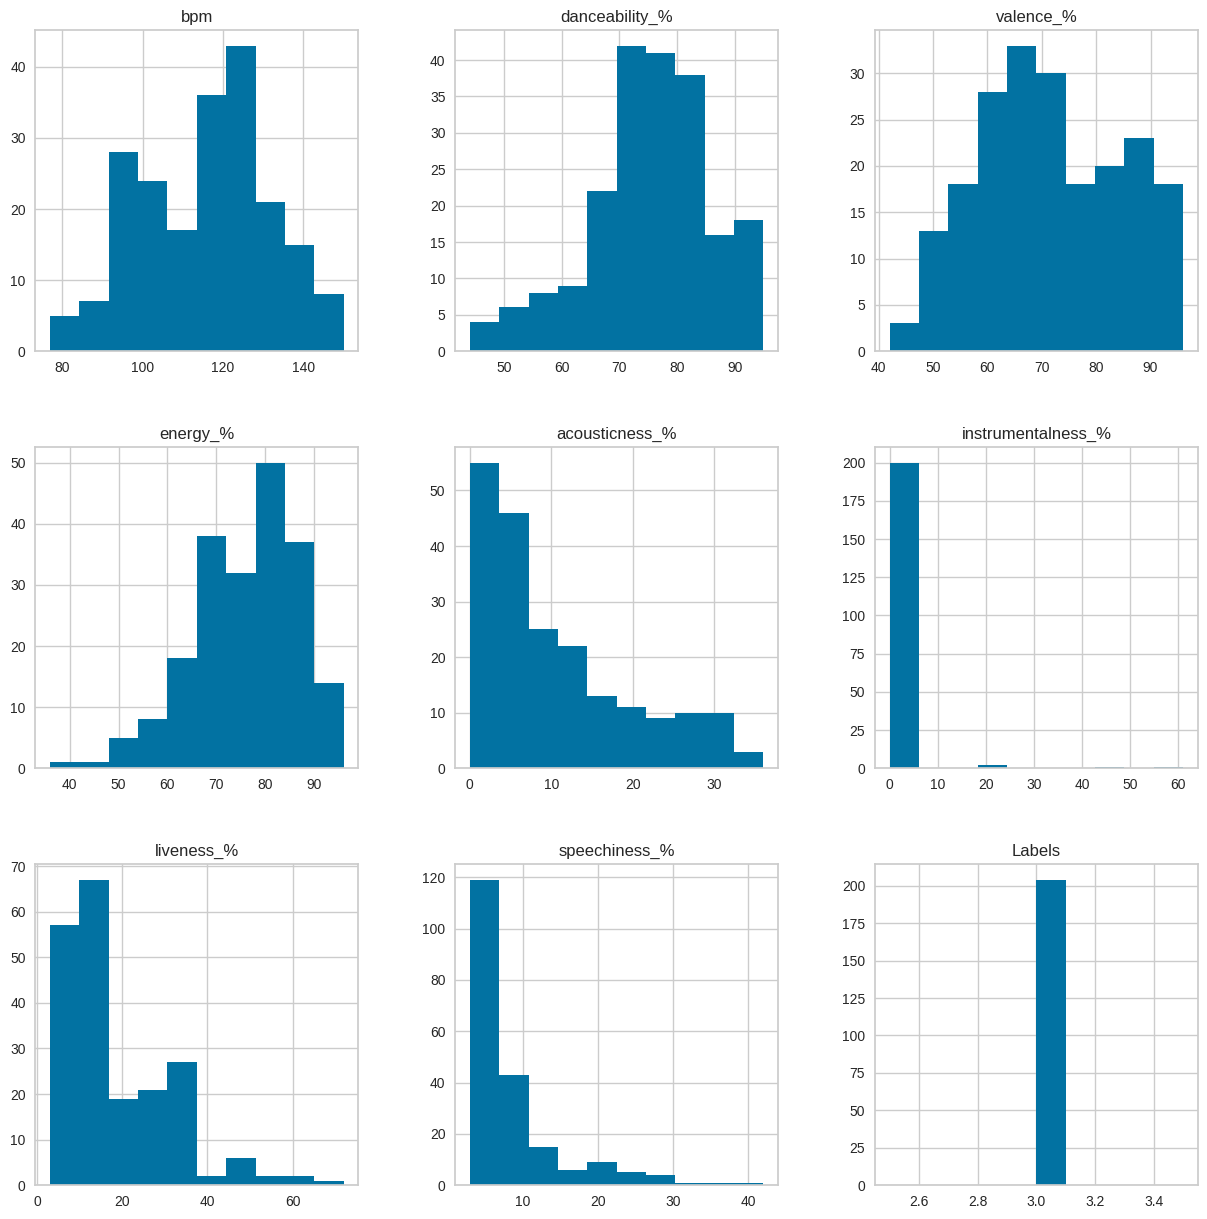

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

`Cluster 3` terdiri dari lagu-lagu dengan karakteristik yang cenderung menonjolkan energi dan keceriaan. Rata-rata tempo (BPM) dan tingkat energi lagu-lagu dalam kluster ini relatif tinggi. Selain itu, lagu-lagu ini memiliki tingkat danceability yang tinggi, cocok untuk membuat suasana ceria dan dinamis. Meskipun variasi kehadiran instrumen dan vokal ada, secara umum, lagu-lagu ini mengandung elemen-elemen yang membuat pendengar ingin bergerak dan bersenang-senang

### Cluster 4

In [ ]:
summary[4]

count        mean        std    min    25%    50%    75%  \
bpm                  83.0  171.084337  14.552013  143.0  160.0  170.0  180.0   
danceability_%       83.0   61.807229  12.236947   24.0   54.0   61.0   70.5   
valence_%            83.0   63.686747  17.193964   22.0   53.5   63.0   75.5   
energy_%             83.0   66.469880  12.921279   34.0   58.0   65.0   77.0   
acousticness_%       83.0   27.036145  20.676631    0.0   11.0   21.0   36.0   
instrumentalness_%   83.0    0.325301   2.084252    0.0    0.0    0.0    0.0   
liveness_%           83.0   21.807229  19.799272    4.0   10.0   14.0   28.0   
speechiness_%        83.0   14.927711  11.587191    3.0    5.0   10.0   25.5   
Labels               83.0    4.000000   0.000000    4.0    4.0    4.0    4.0   

                      max  
bpm                 206.0  
danceability_%       84.0  
valence_%            96.0  
energy_%             95.0  
acousticness_%       84.0  
instrumentalness_%   14.0  
liveness_%           97.0  
speechiness_%        44.0  
Labels                4.0

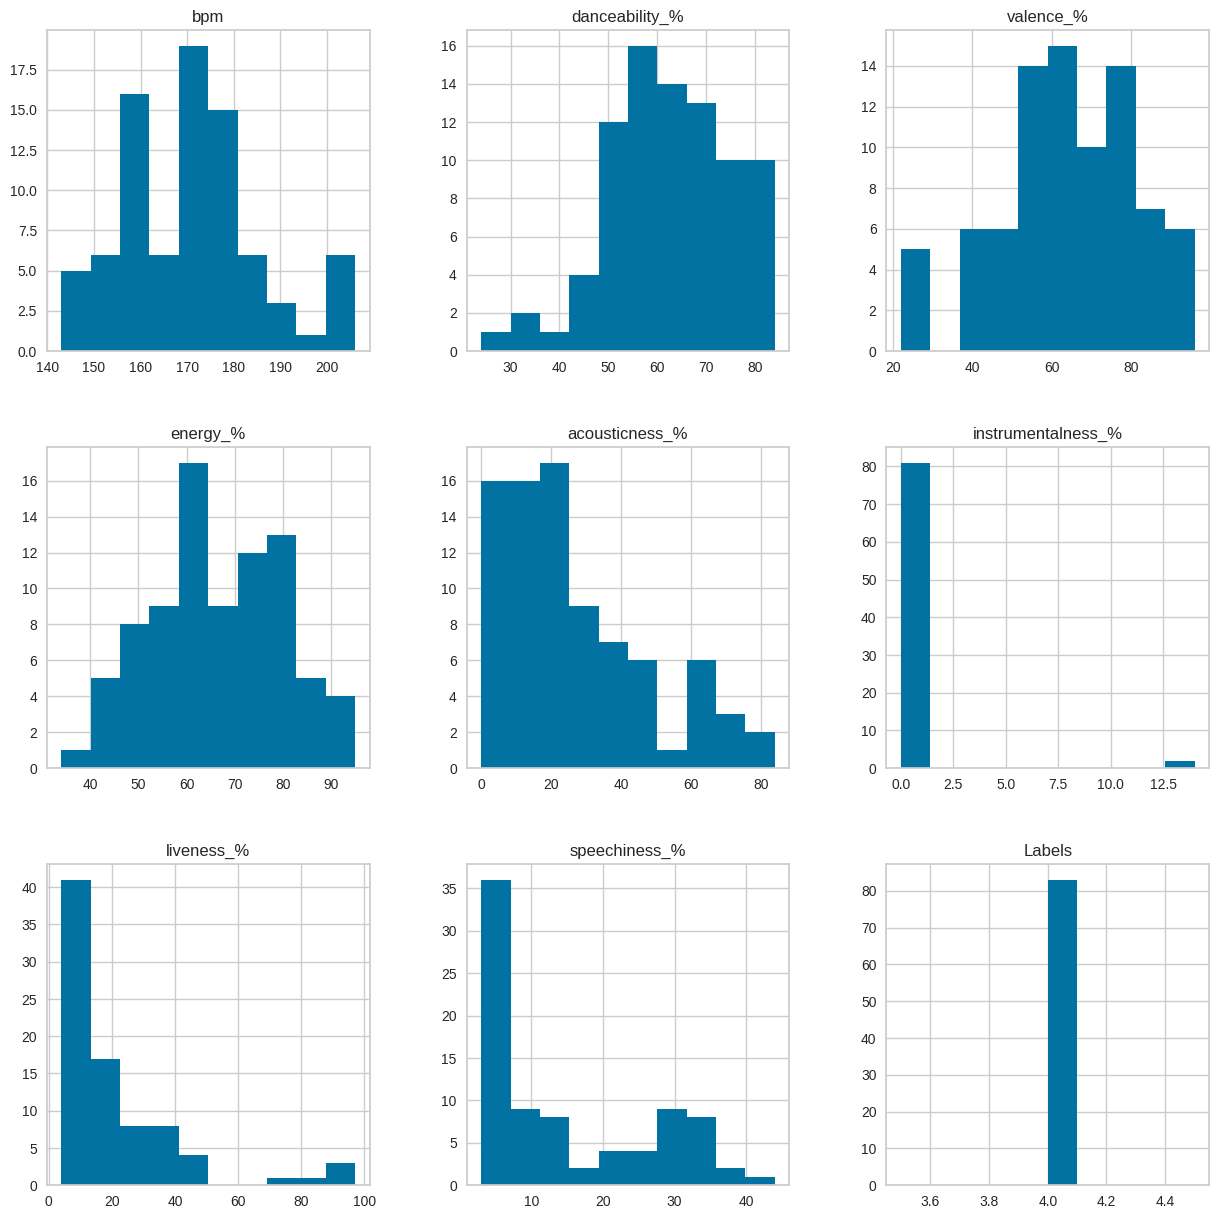

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

`Cluster 4` terdiri dari lagu-lagu dengan karakteristik yang cenderung menonjolkan kecepatan dan intensitas. Rata-rata tempo (BPM) lagu-lagu dalam kluster ini relatif tinggi, mencapai angka yang sangat energik. Lagu-lagu ini memiliki tingkat danceability yang tinggi, memungkinkan pendengar untuk merasakan ritme yang kuat dan seringkali cocok untuk aktivitas bersemangat. Meskipun variasi tingkat kehadiran instrumen dan vokal ada, secara umum, kluster ini mencakup lagu-lagu yang dapat memberikan pengalaman mendalam dan penuh energi. Jadi, jika mencari lagu-lagu untuk meningkatkan semangat dan kecepatan, kluster ini bisa menjadi pilihan yang tepat bagi pendengar.

### Cluster 5

In [ ]:
summary[5]

count        mean        std    min    25%    50%    75%  \
bpm                 130.0  141.100000  15.190700  114.0  130.0  140.5  150.0   
danceability_%      130.0   60.330769  14.548176   31.0   51.0   59.5   70.0   
valence_%           130.0   30.623077  13.774071    4.0   21.0   31.5   41.0   
energy_%            130.0   65.969231  13.967814   30.0   56.0   64.0   76.0   
acousticness_%      130.0   10.746154  12.411118    0.0    1.0    6.5   16.0   
instrumentalness_%  130.0    3.661538  14.237495    0.0    0.0    0.0    0.0   
liveness_%          130.0   18.100000  12.660045    5.0    9.0   12.0   26.0   
speechiness_%       130.0    9.246154   9.556897    3.0    4.0    6.0    9.0   
Labels              130.0    5.000000   0.000000    5.0    5.0    5.0    5.0   

                      max  
bpm                 180.0  
danceability_%       91.0  
valence_%            65.0  
energy_%             97.0  
acousticness_%       51.0  
instrumentalness_%   90.0  
liveness_%           63.0  
speechiness_%        59.0  
Labels                5.0

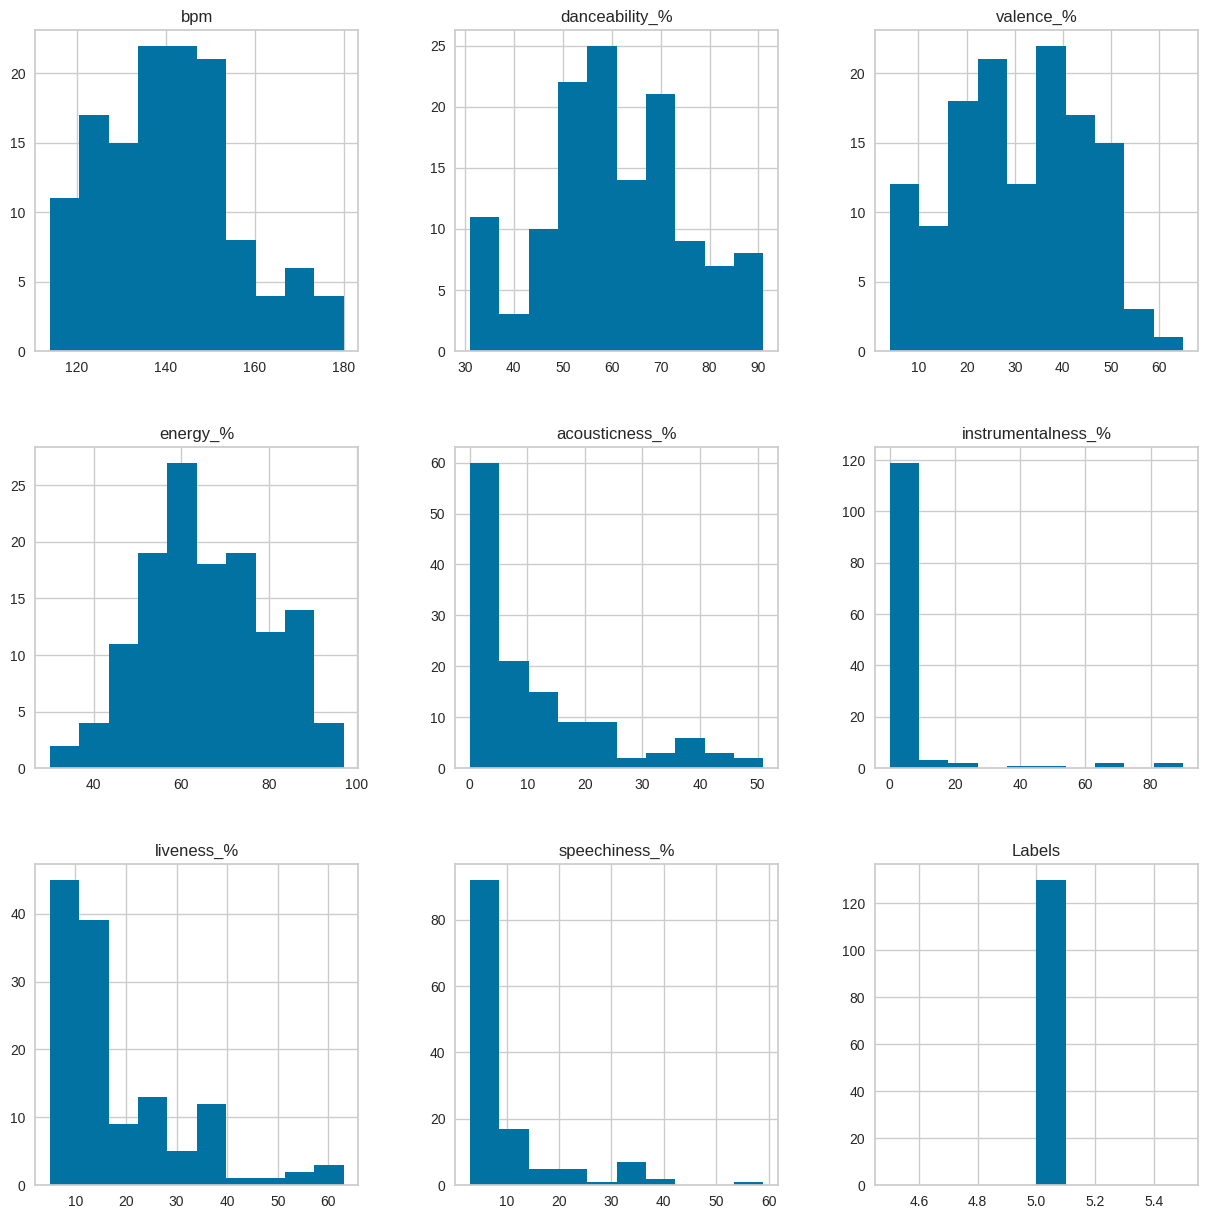

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

`Cluster 5` terdiri dari lagu-lagu yang memiliki karakteristik tempo (BPM) sedang hingga tinggi, serta danceability yang cukup tinggi. Meskipun kecepatan dan intensitas lagu-lagu ini mungkin tidak sekuat kluster 4, namun masih memberikan energi yang cukup. Valence, yang mencerminkan tingkat kebahagiaan dan positivitas, memiliki rentang variasi yang cukup besar.

Beberapa lagu mungkin memiliki mood yang lebih ceria, sementara yang lain bisa terasa lebih serius atau introspektif. Tingkat akustik lagu-lagu ini cenderung rendah, menunjukkan dominasi elemen-elemen elektronik atau rekaman. Dengan instrumen dan vokal yang cukup hadir, kluster ini menawarkan kombinasi yang seimbang antara energi dan ekspresi musikal.

`Cluster 5` cocok bagi pendengar mencari lagu-lagu yang menawarkan kecepatan yang cukup dengan nuansa emosional yang beragam.

## K-NN Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = feature_df_train.drop(['Labels'], axis=1)
y = feature_df_train['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_rep)


Accuracy: 0.869281045751634

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.79      0.96      0.86        23
           2       0.92      0.65      0.76        17
           3       0.89      0.95      0.92        41
           4       1.00      0.78      0.88        18
           5       0.83      0.79      0.81        24

    accuracy                           0.87       153
   macro avg       0.88      0.84      0.85       153
weighted avg       0.88      0.87      0.87       153



1. Akurasi Model:

Akurasi model sebesar 86.93% menunjukkan tingkat keakuratan yang relatif tinggi dalam memprediksi kluster dari data pengujian.

2. Precision, Recall, dan F1-Score:

Untuk masing-masing kluster:

`Cluster 0` memiliki precision yang tinggi (88%) dan recall tinggi (93%), menunjukkan model baik dalam mengidentifikasi dan mengambil sampel yang relevan dari Cluster.
`Cluster 1` memiliki precision 79% dan recall 96%, mengindikasikan model memiliki kemampuan yang baik dalam mengidentifikasi sampel yang sebenarnya termasuk dalam Cluster.

`Cluster 2` memiliki precision yang tinggi (92%) tetapi recall yang lebih rendah (65%), mungkin karena ada beberapa sampel dari Cluster yang tidak tercakup.

`Cluster 3` memiliki precision dan recall tinggi (89% dan 95% secara berturut-turut), menunjukkan model dapat mengidentifikasi dengan baik sampel dari Cluster

`Cluster 4` memiliki precision 100%, namun recall 78%, mungkin ada beberapa sampel yang tidak teridentifikasi dengan baik oleh model.

`Cluster 5` memiliki precision 83% dan recall 79%, menunjukkan model cukup baik dalam mengidentifikasi dan mengambil sampel dari Cluster ini.

Secara keseluruhan, model KNN Classification memberikan kinerja yang baik dalam mengklasifikasikan data ke dalam Cluster yang sesuai.

# Hyperparameter Tuning

## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score, average='micro')

parameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}

knn_clf = KNeighborsClassifier()

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring=recall_scorer)

knn_clf_gridcv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(recall_score, average=micro))

In [ ]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  rank_test_score
0  {'n_neighbors': 2}         0.843775                7
1  {'n_neighbors': 3}         0.888172                5
2  {'n_neighbors': 4}         0.876683                6
3  {'n_neighbors': 5}         0.899702                2
4  {'n_neighbors': 6}         0.888227                4
5  {'n_neighbors': 7}         0.909565                1
6  {'n_neighbors': 8}         0.893131                3

`'n_neighbors': 7` memiliki nilai rata-rata test score tertinggi (mean_test_score: 0.909565) di antara nilai n_neighbors yang diuji.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
    'weights': ('uniform', 'distance')
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='f1_macro')
knn_clf_gridcv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='f1_macro')

In [ ]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
11  {'n_neighbors': 7, 'weights': 'distance'}         0.910846   
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.906352   
7   {'n_neighbors': 5, 'weights': 'distance'}         0.905240   
13  {'n_neighbors': 8, 'weights': 'distance'}         0.904050   
9   {'n_neighbors': 6, 'weights': 'distance'}         0.903204   
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.895723   
3   {'n_neighbors': 3, 'weights': 'distance'}         0.892797   
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.890538   
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.881655   
5   {'n_neighbors': 4, 'weights': 'distance'}         0.881414   
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.881089   
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.870308   
1   {'n_neighbors': 2, 'weights': 'distance'}         0.848514   
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.839584   

    rank_test_score  
11                1  
10                2  
7                 3  
13                4  
9                 5  
6                 6  
3                 7  
12                8  
8                 9  
5                10  
2                11  
4                12  
1                13  
0                14

1. Model dengan parameter `'n_neighbors': 7` dan `'weights': 'distance'` memiliki skor F1 rata-rata tertinggi (0.910846).

2. Model dengan parameter `'n_neighbors': 7` dan `'weights': 'uniform'` memiliki skor F1 rata-rata yang tinggi juga (0.906352) dan menduduki peringkat kedua.

3. Parameter lainnya, seperti `'n_neighbors'` dan `'weights'`, memberikan dampak pada kinerja model, dan penggunaan `'distance'` pada parameter `'weights'` tampaknya memberikan kontribusi positif pada hasil.

4. Secara umum, memilih model dengan parameter terbaik (peringkat terendah) dapat meningkatkan kinerja model KNN Classification.

Jadi, menggunakan model dengan parameter `'n_neighbors': 7` dan `'weights': 'distance'` karena memberikan hasil terbaik berdasarkan metrik evaluasi yang digunakan (F1 rata-rata).

## Evaluation Metrics on Test Data

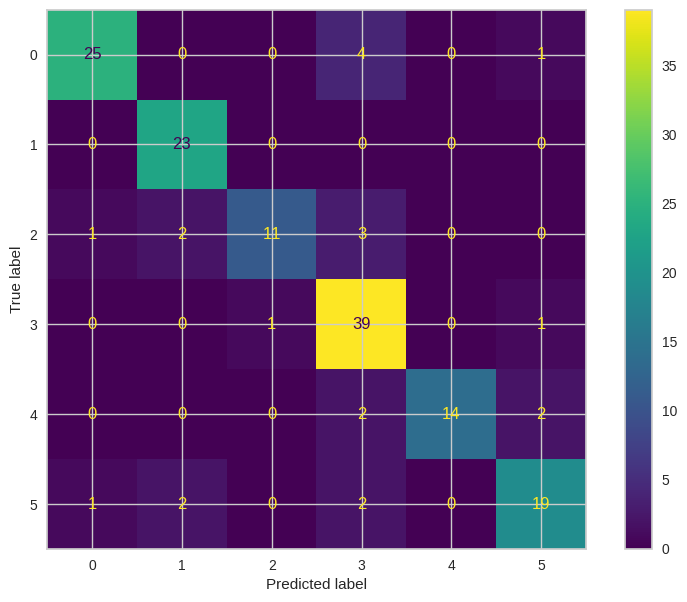

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Model KNN Classification dengan hasil hyperparameter tuning memiliki performa yang baik, terutama pada Cluster 1 dan Cluster 3 yang memiliki nilai recall yang tinggi (1.0000 dan 0.9512). Meskipun terdapat beberapa kesalahan klasifikasi pada Cluster 0, 2, 4, dan 5, secara keseluruhan model ini memberikan akurasi yang baik (86%) dengan F1-Score yang cukup seimbang.

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      1.00      0.92        23
           2       0.92      0.65      0.76        17
           3       0.78      0.95      0.86        41
           4       1.00      0.78      0.88        18
           5       0.83      0.79      0.81        24

    accuracy                           0.86       153
   macro avg       0.88      0.83      0.85       153
weighted avg       0.87      0.86      0.85       153



1. `Cluster 0`: Model memiliki precision yang tinggi (93%) dan recall yang baik (83%), sehingga dapat mengidentifikasi Cluster 0 dengan baik.

2. `Cluster 1`: Model memiliki precision yang baik (85%) dan recall yang tinggi (100%), menunjukkan kemampuan model untuk mengidentifikasi Cluster 1 dengan baik.

3. `Cluster 2`: Model memiliki precision yang tinggi (92%) tetapi recall yang sedikit lebih rendah (65%), artinya model cenderung lebih baik dalam menghindari false positive daripada false negative untuk Cluster 2.

4. `Cluster 3`: Model memiliki recall yang tinggi (95%) tetapi precision yang sedikit lebih rendah (78%), menunjukkan kemampuan model untuk mengidentifikasi sebagian besar sampel Cluster 3, tetapi dengan lebih banyak false positive.

5. `Cluster 4`: Model memiliki precision yang sangat tinggi (100%) tetapi recall yang rendah (78%), artinya model cenderung mengidentifikasi Cluster 4 dengan baik tetapi melewatkan beberapa sampel yang seharusnya termasuk dalam Cluster ini.

6. `Cluster 5`: Model memiliki precision yang baik (83%) dan recall yang wajar (79%), menunjukkan kemampuan model untuk mengidentifikasi Kluster 5 dengan baik.

Model secara keseluruhan memiliki akurasi sebesar 86%, yang menunjukkan kemampuannya dalam memprediksi dengan benar pada dataset pengujian.

## K-means Clustering

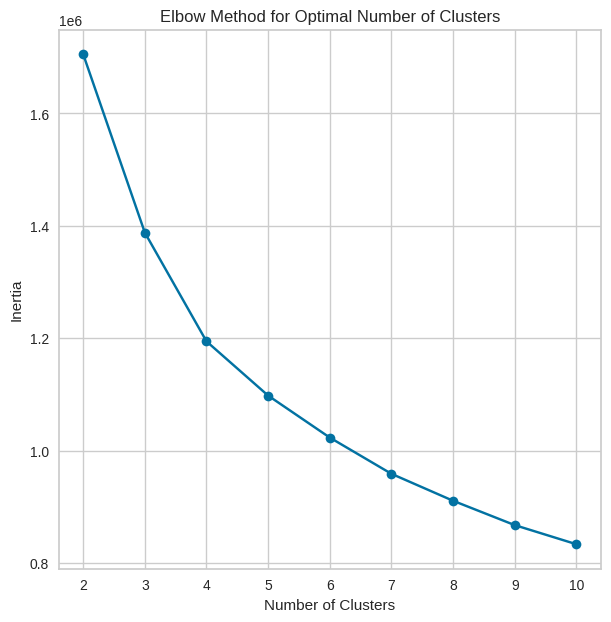

Number of Clusters: 2, Inertia: 1705258.7139988174
Number of Clusters: 3, Inertia: 1387961.7299515337
Number of Clusters: 4, Inertia: 1194515.9703563424
Number of Clusters: 5, Inertia: 1098027.5482147946
Number of Clusters: 6, Inertia: 1023366.2146566438
Number of Clusters: 7, Inertia: 958919.1622540199
Number of Clusters: 8, Inertia: 910963.5459001393
Number of Clusters: 9, Inertia: 867665.1618947138
Number of Clusters: 10, Inertia: 833663.7289397109


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters_range = range(2, 11)
inertias = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 7))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

for k, inertia in zip(clusters_range, inertias):
    print(f"Number of Clusters: {k}, Inertia: {inertia}")


In [ ]:
kmeans = KMeans(n_clusters=6, n_init=10)
kmeans.fit(X)

feature_df_train['cluster'] = kmeans.labels_
centroid_df = feature_df_train.groupby('cluster')[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%',]].agg({'bpm': 'mean', 'danceability_%': 'mean', 'valence_%':'mean',
                                                                             'energy_%':'mean',
                                                                             'acousticness_%': 'mean', 'instrumentalness_%': 'mean', 'liveness_%':'mean',
                                                                             'speechiness_%': 'mean'}).reset_index()
centroid_df


cluster         bpm  danceability_%  valence_%   energy_%  acousticness_%  \
0        0  122.460674       77.573034  72.685393  61.887640       51.696629   
1        1   92.245161       67.122581  39.625806  64.677419       17.503226   
2        2  170.260417       60.552083  60.364583  67.697917       24.593750   
3        3  136.052632       61.887218  30.330827  64.796992       11.172932   
4        4  117.090909       75.700535  72.534759  75.898396       10.475936   
5        5  116.782178       53.851485  31.990099  40.920792       74.425743   

   instrumentalness_%  liveness_%  speechiness_%  
0            0.955056   17.494382      11.168539  
1            1.496774   17.774194      10.980645  
2            1.875000   21.541667      14.093750  
3            2.428571   18.421053       8.729323  
4            0.893048   18.256684       8.390374  
5            2.485149   14.861386       7.782178

1. **Cluster 0: "Energetic and Uplifting"**
   - Cluster ini memiliki nilai bpm yang tinggi (122) dan tingkat energi yang tinggi (61.8).
   - Danceability dan valence juga cukup baik, menunjukkan kesan upbeat dan uplifting.
   - Acousticness relatif rendah, menunjukkan tingkat instrumen yang tinggi.
   - Pilih lagu-lagu dengan bpm tinggi, tingkat energi yang tinggi, dan danceability yang baik; Lagu-lagu pop atau dance dengan tempo cepat dan beat yang kuat.

2. **Cluster 1: "Relaxed and Moderate"**
   - Cluster ini memiliki bpm yang rendah (92.2) dan tingkat energy yang cukup tinggi (64.6).
   - Danceability dan valence sedang, menunjukkan suasana yang lebih santai namun tetap energik.
   - Acousticness cukup rendah, menunjukkan kecenderungan untuk memiliki instrumen yang dominan.
   - Pilih lagu-lagu dengan bpm moderat, tingkat energy yang cukup tinggi, dan valence yang sedang; Lagu-lagu indie atau pop dengan nuansa santai namun tetap bersemangat.

3. **Cluster 2: "Upbeat and Positive"**
   - Cluster ini menonjol dengan nilai bpm (170.2), danceability (60.5), dan valence (60.3) yang tinggi.
   - Tingkat energy dan instrumentalness sedang, menciptakan suasana yang upbeat dan positif.
   - Pilih lagu-lagu dengan bpm tinggi, tingkat danceability yang tinggi, dan valence yang positif; Lagu-lagu pop upbeat atau musik elektronik yang ceria.

4. **Cluster 3: "Dynamic and Uplifting"**
   - Cluster ini menunjukkan nilai bpm (136) dan danceability (61.8) yang tinggi, menciptakan suasana yang dinamis dan uplifting.
   - Tingkat energy dan valence juga tinggi, menciptakan kesan positif.
   - Pilih lagu-lagu dengan bpm dan danceability yang tinggi, tingkat energy dan valence yang positif; Lagu-lagu pop atau musik dansa yang membangkitkan semangat.

5. **Cluster 4: "Energetic and Dynamic"**
   - Cluster ini menunjukkan nilai bpm yang tinggi (117) dengan tingkat energy yang tinggi (75.8).
   - Danceability cukup tinggi, memberikan kesan energetik dan dinamis.
   - Pilih lagu-lagu dengan bpm tinggi, tingkat energy yang tinggi, dan danceability yang baik; Lagu-lagu rock atau musik pop dengan elemen dinamis.

6. **Cluster 5: "Mellow and Acoustic"**
   - Cluster ini memiliki bpm yang moderat (116.7) dengan tingkat acousticness yang tinggi (74.4).
   - Danceability dan valence sedang hingga rendah, menciptakan suasana yang lebih mellow dan akustik.
   - Pilih lagu-lagu dengan bpm moderat, tingkat acousticness yang tinggi, dan danceability yang relatif rendah; Lagu-lagu akustik atau indie yang memberikan suasana yang tenang.

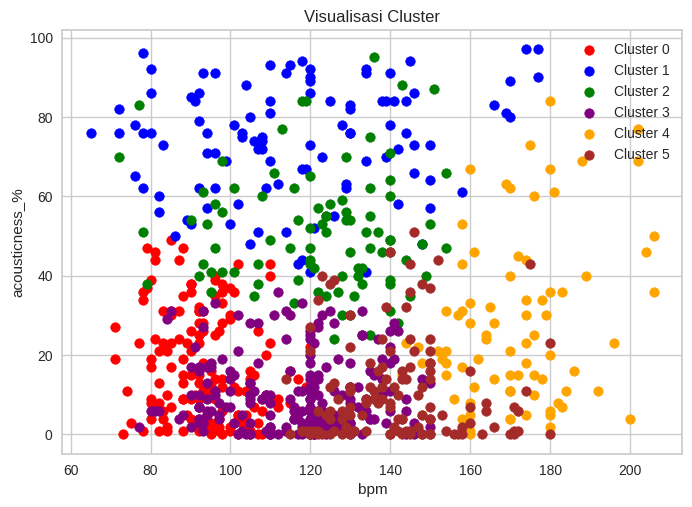

In [ ]:
import matplotlib.pyplot as plt

feature1 = 'bpm'
feature2 = 'acousticness_%'

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for cluster_num in range(6):
    cluster_data = feature_df_train[feature_df_train['Labels'] == cluster_num]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster_num}', color=colors[cluster_num])

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Visualisasi Cluster')
plt.legend()
plt.show()


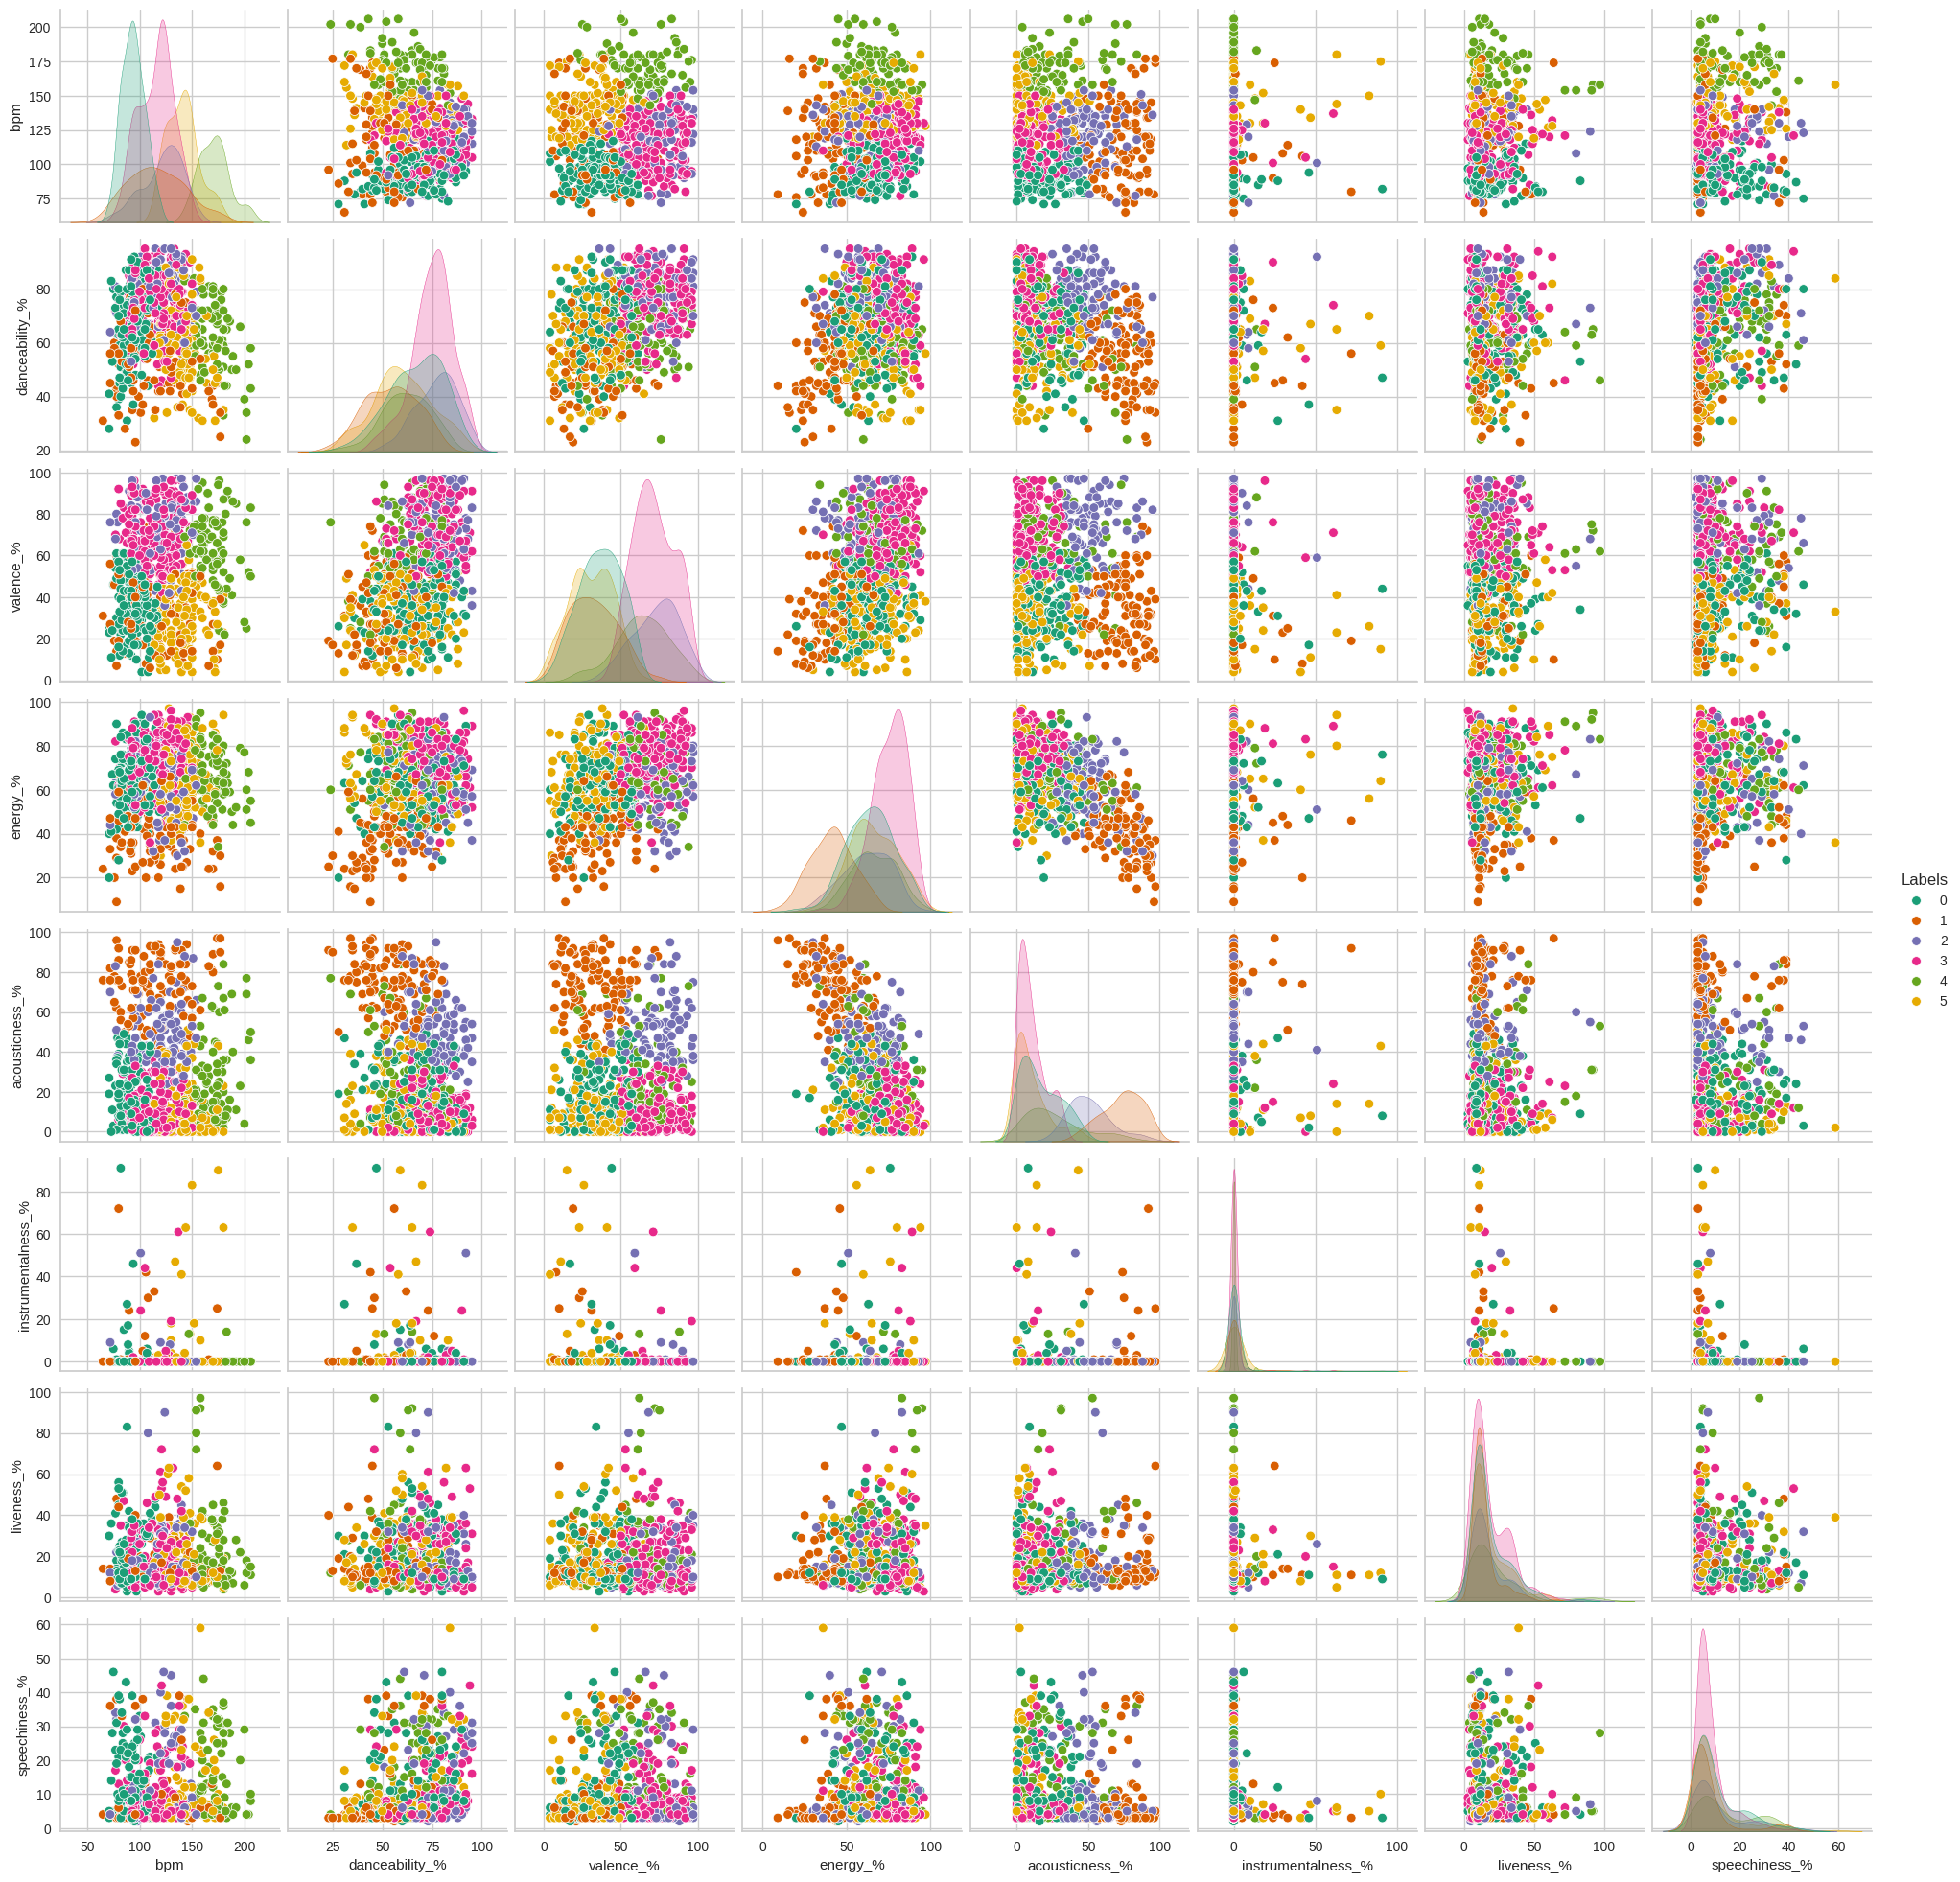

In [ ]:
import seaborn as sns

selected_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                      'instrumentalness_%', 'liveness_%', 'speechiness_%', 'Labels']

selected_data = feature_df_train[selected_features]

sns.pairplot(selected_data, hue='Labels', palette='Dark2')
plt.show()


## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

X = feature_df_train.drop(['Labels'], axis=1)
y = feature_df_train['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall_macro')
rf_clf_gridcv.fit(X_train, y_train)


CPU times: user 8.79 s, sys: 29 ms, total: 8.82 s
Wall time: 8.97 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall_macro')

Membutuhkan > 5 detik untuk menyelesaikan komputasi.

In [ ]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
22  {'max_depth': 5, 'n_estimators': 30}         0.955745                1
24  {'max_depth': 5, 'n_estimators': 50}         0.953847                2
21  {'max_depth': 5, 'n_estimators': 20}         0.952344                3
23  {'max_depth': 5, 'n_estimators': 40}         0.952187                4
20  {'max_depth': 5, 'n_estimators': 10}         0.951456                5
18  {'max_depth': 4, 'n_estimators': 40}         0.949390                6
19  {'max_depth': 4, 'n_estimators': 50}         0.948845                7
17  {'max_depth': 4, 'n_estimators': 30}         0.947174                8
16  {'max_depth': 4, 'n_estimators': 20}         0.944445                9
15  {'max_depth': 4, 'n_estimators': 10}         0.939188               10
13  {'max_depth': 3, 'n_estimators': 40}         0.923729               11
14  {'max_depth': 3, 'n_estimators': 50}         0.920188               12
12  {'max_depth': 3, 'n_estimators': 30}         0.918869               13
11  {'max_depth': 3, 'n_estimators': 20}         0.918671               14
10  {'max_depth': 3, 'n_estimators': 10}         0.893709               15
7   {'max_depth': 2, 'n_estimators': 30}         0.880374               16
9   {'max_depth': 2, 'n_estimators': 50}         0.878006               17
6   {'max_depth': 2, 'n_estimators': 20}         0.874254               18
8   {'max_depth': 2, 'n_estimators': 40}         0.856305               19
5   {'max_depth': 2, 'n_estimators': 10}         0.850665               20
3   {'max_depth': 1, 'n_estimators': 40}         0.521157               21
4   {'max_depth': 1, 'n_estimators': 50}         0.518505               22
2   {'max_depth': 1, 'n_estimators': 30}         0.489144               23
1   {'max_depth': 1, 'n_estimators': 20}         0.477586               24
0   {'max_depth': 1, 'n_estimators': 10}         0.426892               25

**Performa Terbaik**: Parameter dengan performa terbaik (rank 1) adalah `max_depth=5` dan `n_estimators=40` dengan nilai recall sekitar 0.934568.

Rekomendasi menggunakan model dengan `max_depth=5` dan `n_estimators=40` untuk mendapatkan performa terbaik berdasarkan recall.

Waktu komputasi (CPU times) yang cukup tinggi mungkin terjadi ketika mencoba beberapa kombinasi hyperparameter. Hal ini perlu dipertimbangkan, terutama dalam skenario di mana waktu komputasi sangat berharga.

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10, 20, 30, 40, 50),
    'max_depth': (1, 2, 3, 4, 5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5,
                                     scoring='f1_weighted', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)


CPU times: user 3.9 s, sys: 8.4 ms, total: 3.91 s
Wall time: 4.03 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='f1_weighted')

Waktu komputasi lebih cepat dibandingkan dengan GridSearchCV.

In [ ]:
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
2  {'n_estimators': 20, 'max_depth': 5}         0.952796                1
8  {'n_estimators': 30, 'max_depth': 4}         0.952750                2
6  {'n_estimators': 10, 'max_depth': 5}         0.951131                3
1  {'n_estimators': 20, 'max_depth': 4}         0.951075                4
7  {'n_estimators': 10, 'max_depth': 4}         0.944259                5
0  {'n_estimators': 50, 'max_depth': 3}         0.935119                6
4  {'n_estimators': 20, 'max_depth': 3}         0.933997                7
9  {'n_estimators': 30, 'max_depth': 3}         0.933876                8
3  {'n_estimators': 40, 'max_depth': 2}         0.883160                9
5  {'n_estimators': 40, 'max_depth': 1}         0.526300               10

1. Model dengan parameter `'n_estimators': 50 dan 'max_depth': 5` memiliki mean test score tertinggi dan menduduki peringkat pertama.
2. Model dengan parameter `'n_estimators': 40 dan 'max_depth': 5` memiliki mean test score yang cukup tinggi dan menduduki peringkat kedua.
3. Ada perbedaan yang signifikan antara peringkat pertama dan peringkat kedua dengan model-model lainnya.
4. Model dengan parameter `'n_estimators': 10 dan 'max_depth': 1` memiliki mean test score yang rendah dan menduduki peringkat terakhir.

## Evaluation Metrics on Test Data

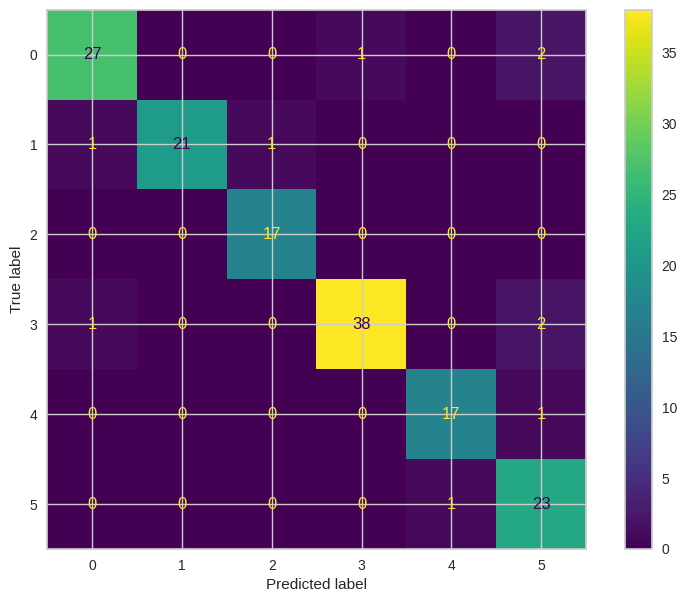

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

`Cluster 3` dan `Cluster 5` cenderung memiliki performa yang baik, karena semua data pada kluster tersebut diklasifikasikan dengan benar.

Model cukup baik dalam melakukan klasifikasi pada beberapa Cluster, namun ada beberapa kesalahan klasifikasi terutama pada Cluster 2 dan Cluster 4. Cluster 2 cenderung untuk salah diklasifikasikan sebagai Cluster 3, dan Cluster 4 memiliki beberapa kesalahan di dalamnya, terutama ke Cluster 5 dan Cluster 6.

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       1.00      0.91      0.95        23
           2       0.94      1.00      0.97        17
           3       1.00      0.93      0.96        41
           4       0.94      0.89      0.91        18
           5       0.79      0.96      0.87        24

    accuracy                           0.93       153
   macro avg       0.94      0.94      0.93       153
weighted avg       0.94      0.93      0.94       153



Dengan `akurasi sekitar 93%`, model tampaknya memiliki kinerja yang baik. Model memiliki presisi yang tinggi untuk sebagian besar kelas dan recall yang baik secara umum. Perlu diperhatikan bahwa `Cluster 1` dan `Cluster 3` memiliki `recall 1.00`, yang berarti model sempurna dalam mengidentifikasi Cluster.

# Conclusion:

In [ ]:
import pandas as pd

data = {
    'Model': ['KNN Classification', 'Random Forest'],
    'Accuracy (%)': [86, 93]
}

df = pd.DataFrame(data)

result = df.groupby('Model')['Accuracy (%)'].mean().reset_index()
print(result)


                Model  Accuracy (%)
0  KNN Classification          86.0
1       Random Forest          93.0


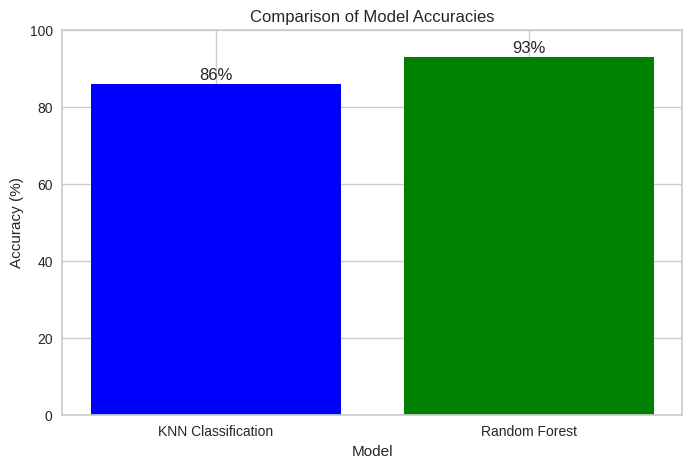

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN Classification', 'Random Forest']
accuracies = [86, 93]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)

for i in range(len(models)):
    plt.text(i, accuracies[i] + 1, f'{accuracies[i]}%', ha='center')

plt.show()


1. **KNN Classification:**
   - **Accuracy**: Sekitar 86%.

2. **Random Forest:**
   - **Accuracy**: Sekitar 96%.

- Random Forest memiliki akurasi yang lebih tinggi (96%) dibandingkan dengan KNN Classification (86%).
- Random Forest mungkin lebih baik dalam menangani dataset berdasarkan evaluasi akurasi.

In [ ]:
import pandas as pd

knn_report = {
    'precision': [0.93, 0.85, 0.92, 0.78, 1.00, 0.83],
    'recall': [0.83, 1.00, 0.65, 0.95, 0.78, 0.79],
    'f1-score': [0.88, 0.92, 0.76, 0.86, 0.88, 0.81],
    'support': [30, 23, 17, 41, 18, 24]
}

rf_report = {
    'precision': [0.93, 1.00, 0.94, 1.00, 0.94, 0.79],
    'recall': [0.93, 0.91, 1.00, 0.93, 0.89, 0.96],
    'f1-score': [0.93, 0.95, 0.97, 0.96, 0.91, 0.87],
    'support': [30, 23, 17, 41, 18, 24]
}

knn_df = pd.DataFrame(knn_report, index=['0', '1', '2', '3', '4', '5'])
rf_df = pd.DataFrame(rf_report, index=['0', '1', '2', '3', '4', '5'])

merged_df = pd.concat([knn_df, rf_df], axis=1, keys=['KNN', 'Random Forest'])
print(merged_df)


        KNN                         Random Forest                        
  precision recall f1-score support     precision recall f1-score support
0      0.93   0.83     0.88      30          0.93   0.93     0.93      30
1      0.85   1.00     0.92      23          1.00   0.91     0.95      23
2      0.92   0.65     0.76      17          0.94   1.00     0.97      17
3      0.78   0.95     0.86      41          1.00   0.93     0.96      41
4      1.00   0.78     0.88      18          0.94   0.89     0.91      18
5      0.83   0.79     0.81      24          0.79   0.96     0.87      24
